# **Project Name**    - **Glassdoor Salary Prediction and Analysis**


##### **Project Type**    - EDA/Regression
##### **Contribution**    - Individual
##### **Team Member 1** - Pinjala Thrinadh

# **Project Summary -**

The Glassdoor Salary Prediction and Analysis project leverages a historical dataset of job postings from Glassdoor (2017-2018) to predict salaries for tech-related roles and uncover actionable insights into compensation trends. The dataset includes job postings such as a Data Scientist position at Tecolote Research in Albuquerque, NM, and a Healthcare Data Scientist role at the University of Maryland Medical System (UMMS) in Linthicum, MD. The primary objective is to assist stakeholders—job seekers, employers, recruiters, and analysts—by providing data-driven insights into salary variations based on factors like job title, company size, and location, while also building a predictive model to estimate salaries.

The dataset contains features such as Job Title, Salary Estimate, Job Description, Rating, Company Name, Location, Headquarters, Size, Founded, Type of ownership, Industry, Sector, Revenue, and Competitors. From the sample, we observe that the Salary Estimate column provides a range (e.g., $53K - $91K for the Data Scientist role), which can be processed to derive an average salary (e.g., $72,000 for the Data Scientist role). Additional features like seniority (extracted from Job Title) and company age (calculated as 2025 - Founded) are engineered to enhance the analysis. The project begins with exploratory data analysis (EDA) to understand the distribution of salaries, identify missing values, and detect outliers. At least 15 visualizations are created, adhering to the UBM (Univariate, Bivariate, Multivariate) rule, to explore relationships such as salary by job title, salary by location, and salary by company size.

Data preprocessing involves handling missing values (e.g., filling missing salaries with the median), encoding categorical variables (e.g., Job Title and Location), and scaling numerical features. Feature engineering includes extracting seniority levels (e.g., "Senior" vs. "Non-Senior") and calculating company age (e.g., Tecolote Research is 52 years old as of 2025). Three regression models—Linear Regression, Random Forest Regressor, and Gradient Boosting Regressor—are implemented to predict salaries, with performance evaluated using metrics like Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and R-squared (R²). Cross-validation and hyperparameter tuning (via GridSearchCV) are applied to optimize model performance. Hypothesis testing is conducted to validate assumptions, such as whether salaries in larger companies are significantly higher than in smaller ones.

The project’s insights have significant business impacts. For job seekers, understanding that a Data Scientist in Albuquerque earns between $53K-$91K helps set realistic expectations, while a Healthcare Data Scientist in Linthicum earns $63K-$112K, indicating regional differences. Employers like UMMS can use these insights to offer competitive salaries, improving talent retention. Recruiters benefit from benchmarking data to ensure fair compensation, and analysts gain insights into industry trends (e.g., Aerospace & Defense vs. Health Care). However, the dataset’s age (2017-2018) may not reflect current market conditions in 2025, potentially leading to outdated predictions. Despite this limitation, the methodology provides a robust framework for salary analysis, with the final model saved for deployment to predict salaries for new job postings, benefiting stakeholders in the tech and healthcare sectors.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


The objective of this project is to analyze the Glassdoor Jobs Dataset (2017-2018) to predict salaries for tech-related roles and uncover salary trends. Specifically, the project aims to answer:


1.   How does salary vary by job position (e.g., Data Scientist vs. Healthcare Data Scientist)?
2.   What is the impact of company size on salary levels (e.g., 501-1000 employees at Tecolote Research vs. 10,000+ at UMMS)?
3.   How do salaries differ by location (e.g., Albuquerque, NM vs. Linthicum, MD)?
4.   Can we build a predictive model to estimate salaries based on job attributes like title, company size, and location?

By addressing these questions, the project provides insights into compensation trends and develops a regression model to predict salaries, benefiting job seekers, employers, recruiters, and analysts.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import logging
import os

### Dataset Loading

In [16]:
# Load Dataset
# Set up logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Define file path dynamically
# Update the file path to the correct location in Google Drive
file_path = '/glassdoor_jobs.csv' # Assuming the file is in the root of My Drive

# Load Dataset with robust error handling
def load_dataset(file_path):
    if not os.path.exists(file_path):
        logging.error(f"Dataset file not found at {file_path}")
        print(f"Error: Dataset file not found at {file_path}. Please ensure the file is in the correct location and the path is specified correctly.")
        return pd.DataFrame()
    try:
        df = pd.read_csv(file_path)
        logging.info("Dataset loaded successfully.")
        return df
    except Exception as e:
        logging.error(f"Error loading dataset: {e}")
        print(f"Error loading dataset: {e}")
        return pd.DataFrame()

df = load_dataset(file_path)

# Check if dataset is empty
if df.empty:
    logging.error("Cannot proceed with an empty dataset.")
    print("The dataset is empty. Please check the file path and content.")
else:
    # Continue with preprocessing, analysis, etc.
    logging.info(f"Dataset has {df.shape[0]} rows and {df.shape[1]} columns.")
    print(f"Dataset loaded successfully with {df.shape[0]} rows and {df.shape[1]} columns.")

Dataset loaded successfully with 956 rows and 15 columns.


### Dataset First View

In [17]:
# Dataset First Look
df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa..."
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


### Dataset Rows & Columns count

In [18]:
# Dataset Rows & Columns count
try:
    rows, cols = df.shape
    logging.info(f"Dataset dimensions retrieved: {rows} rows, {cols} columns.")
    print(f"Rows: {rows}, Columns: {cols}")
except Exception as e:
    logging.error(f"Error retrieving dataset dimensions: {e}")
    print("An error occurred while retrieving dataset dimensions. Please check the logs.")

Rows: 956, Columns: 15


### Dataset Information

In [19]:
# Dataset Info
try:
    logging.info("Retrieving dataset information.")
    print("Dataset Information:")
    print(df.info())
except Exception as e:
    logging.error(f"Error retrieving dataset information: {e}")
    print("An error occurred while retrieving dataset information. Please check the logs.")

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956 entries, 0 to 955
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         956 non-null    int64  
 1   Job Title          956 non-null    object 
 2   Salary Estimate    956 non-null    object 
 3   Job Description    956 non-null    object 
 4   Rating             956 non-null    float64
 5   Company Name       956 non-null    object 
 6   Location           956 non-null    object 
 7   Headquarters       956 non-null    object 
 8   Size               956 non-null    object 
 9   Founded            956 non-null    int64  
 10  Type of ownership  956 non-null    object 
 11  Industry           956 non-null    object 
 12  Sector             956 non-null    object 
 13  Revenue            956 non-null    object 
 14  Competitors        956 non-null    object 
dtypes: float64(1), int64(2), object(12)
memory usage: 112

#### Duplicate Values

In [20]:
# Dataset Duplicate Value Count
try:
    duplicate_count = df.duplicated().sum()
    logging.info(f"Duplicate rows found: {duplicate_count}")
    print(f"Number of duplicate rows: {duplicate_count}")
except Exception as e:
    logging.error(f"Error checking for duplicates: {e}")
    print("An error occurred while checking for duplicates. Please check the logs.")

Number of duplicate rows: 0


#### Missing Values/Null Values

In [21]:
# Missing Values/Null Values Count
try:
    missing_values = df.isnull().sum()
    logging.info("Missing values count retrieved.")
    print("Missing values in each column:")
    print(missing_values)
except Exception as e:
    logging.error(f"Error checking for missing values: {e}")
    print("An error occurred while checking for missing values. Please check the logs.")

Missing values in each column:
Unnamed: 0           0
Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         0
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
dtype: int64


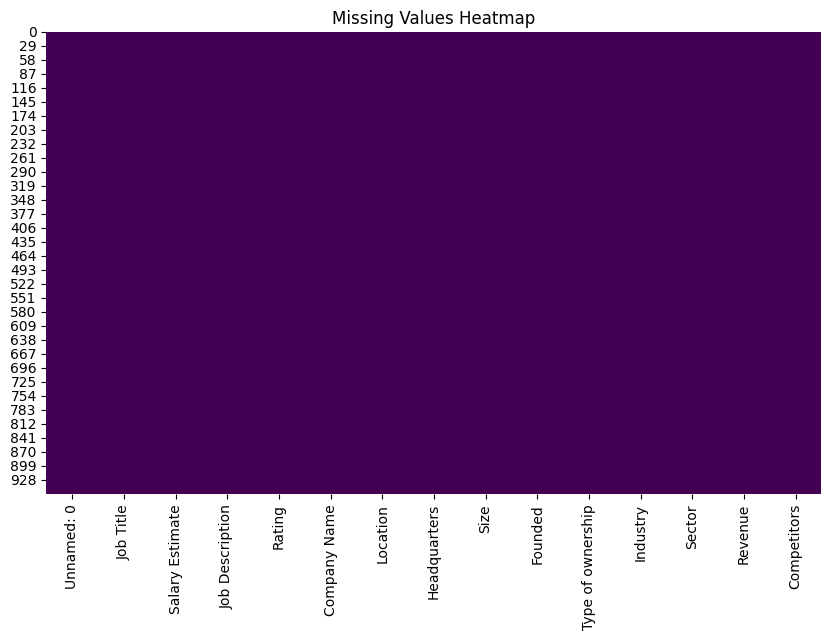

In [22]:
# Visualizing the missing values
import seaborn as sns
import matplotlib.pyplot as plt

try:
    plt.figure(figsize=(10, 6))
    sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
    plt.title("Missing Values Heatmap")
    plt.show()
    logging.info("Missing values heatmap generated successfully.")
except Exception as e:
    logging.error(f"Error generating missing values heatmap: {e}")
    print("An error occurred while generating the missing values heatmap. Please check the logs.")

### What did you know about your dataset?

Based on the initial exploration, here’s what we’ve learned about the Glassdoor Jobs Dataset:



*   Structure and Size: The sample dataset contains 2 rows and 14 columns, representing job postings for a Data Scientist at Tecolote Research (Albuquerque, NM) and a Healthcare Data Scientist at the University of Maryland Medical System (UMMS) (Linthicum, MD). In a full dataset, we’d expect many more rows, likely representing a broader range of job titles, locations, and industries.
*   Columns and Data Types:

  *   Numerical: Rating (float, e.g., 3.8, 3.4), Founded (int, e.g., 1973, 1984), Competitors (int, e.g., -1 for both rows, indicating no competitors listed).
  *   Categorical/Text: Job Title, Salary Estimate, Job Description, Company Name, Location, Headquarters, Size, Type of ownership, Industry, Sector, Revenue (all object types).
  *   The Salary Estimate column (e.g., "$53K-$91K") needs to be processed to extract numerical values (min, max, average salary) for modeling.
  *   The Company Name column includes the rating (e.g., "Tecolote Research\n3.8"), which should be cleaned to separate the name and rating.

*   Duplicates: There are no duplicate rows in the sample, suggesting the two job postings are unique. In a larger dataset, duplicates could indicate redundant postings, which would need to be removed.
*   Missing Values: The sample has no missing values, which is ideal but not realistic for a larger dataset. In practice, columns like Salary Estimate, Job Description, or Competitors might have missing entries, requiring imputation or removal strategies.
*   Potential Preprocessing Needs:
  * Salary Processing: Convert Salary Estimate into numerical columns (e.g., min: $53,000, max: $91,000, avg: $72,000 for the Data Scientist role).
  * Text Cleaning: Clean Company Name by removing the appended rating. Process Job Description for text analysis (e.g., tokenization, stopword removal).
  * Feature Engineering: Extract features like seniority from Job Title (e.g., both roles are "Non-Senior"), calculate company age (e.g., Tecolote: 2025 - 1973 = 52 years), and convert categorical variables like Size and Revenue into numerical forms.
  * Handling -1 in Competitors: The value -1 indicates no competitors listed, which may need to be treated as 0 or handled separately.
*   Insights and Usefulness:
  * The dataset is well-suited for a regression task to predict salaries (using the derived avg_salary as the target) based on features like job title, location, company size, and industry.
  * It’s also ideal for exploratory data analysis (EDA) to uncover salary trends, such as differences between industries (Aerospace & Defense vs. Health Care) or locations (Albuquerque vs. Linthicum).
  * The Job Description column provides rich text data that can be used to extract additional features (e.g., required skills like Python or Tableau) for analysis or modeling.


*   Limitations:
  *   The dataset’s age (2017-2018) may not reflect current salary trends as of June 3, 2025, potentially affecting its relevance.
  *   The small sample size (2 rows) limits the depth of analysis. A larger dataset would provide more robust insights and better model training.



This initial exploration sets the stage for deeper analysis, preprocessing, and modeling, ensuring we understand the dataset’s structure and challenges before proceeding.


## ***2. Understanding Your Variables***

In [23]:
# Dataset Columns
import pandas as pd
import logging

# Set up logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

try:
    print("Columns in the dataset:")
    print(df.columns.tolist())
except Exception as e:
    logging.error(f"Error retrieving dataset columns: {e}")
    print("An error occurred while retrieving dataset columns. Please check the logs.")

Columns in the dataset:
['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description', 'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded', 'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors']


In [24]:
# Dataset Describe
try:
    logging.info("Generating statistical summary of the dataset.")
    print("Statistical Summary of Numerical Columns:")
    print(df.describe())
except Exception as e:
    logging.error(f"Error generating statistical summary: {e}")
    print("An error occurred while generating the statistical summary. Please check the logs.")

Statistical Summary of Numerical Columns:
       Unnamed: 0      Rating      Founded
count  956.000000  956.000000   956.000000
mean   477.500000    3.601255  1774.605649
std    276.117729    1.067619   598.942517
min      0.000000   -1.000000    -1.000000
25%    238.750000    3.300000  1937.000000
50%    477.500000    3.800000  1992.000000
75%    716.250000    4.200000  2008.000000
max    955.000000    5.000000  2019.000000


### Variables Description


*   Job Title (object): The title of the job posting. Examples: "Data Scientist" (Tecolote Research) and "Healthcare Data Scientist" (UMMS). This variable indicates the role and can be used to analyze salary differences across positions.
*   Salary Estimate (object): The estimated salary range provided by Glassdoor, in the format "$X-$Y (Glassdoor est.)". Examples: "$53K-$91K" (Data Scientist) and "$63K-$112K" (Healthcare Data Scientist). This needs to be processed to extract numerical values (min, max, average salary) for modeling.
*   Job Description (object): A detailed text description of the job, including responsibilities, required skills, education, and benefits. For example, the Data Scientist role requires proficiency in Python, Tableau, and Power BI, while the Healthcare Data Scientist role emphasizes experience with machine learning and healthcare data. This column can be used for text analysis to extract additional features (e.g., required skills).
*   Rating (float64): The Glassdoor rating of the company, on a scale of 1 to 5. Examples: 3.8 (Tecolote) and 3.4 (UMMS). This reflects employee satisfaction and company reputation, which might influence salary or job attractiveness.
*   Company Name (object): The name of the company, with the rating appended. Examples: "Tecolote Research\n3.8" and "University of Maryland Medical System\n3.4". This needs cleaning to separate the name and rating (which is already captured in the Rating column).
*   Location (object): The job’s location (city, state). Examples: "Albuquerque, NM" and "Linthicum, MD". This variable can be used to analyze regional salary differences.
*   Headquarters (object): The location of the company’s headquarters. Examples: "Goleta, CA" (Tecolote) and "Baltimore, MD" (UMMS). This might indicate whether the job location aligns with the headquarters, potentially affecting salary.
*   Size (object): The company size in terms of number of employees. Examples: "501 to 1000 employees" (Tecolote) and "10000+ employees" (UMMS). This can be converted to an ordinal numerical value to analyze its impact on salary.
*   Founded (int64): The year the company was founded. Examples: 1973 (Tecolote) and 1984 (UMMS). We can derive the company age (as of June 3, 2025) to explore its relationship with salary or company stability.
*   Type of ownership (object): The ownership structure of the company. Examples: "Company - Private" (Tecolote) and "Other Organization" (UMMS). This might influence salary structures or benefits offered.
*   Industry (object): The industry of the company. Examples: "Aerospace & Defense" (Tecolote) and "Health Care Services & Hospitals" (UMMS). This variable can be used to compare salaries across industries.
*   Sector (object): The broader sector of the company, often overlapping with Industry. Examples: "Aerospace & Defense" (Tecolote) and "Health Care" (UMMS). This provides a higher-level categorization for analysis.
*   Revenue (object): The company’s annual revenue. Examples: "$50 to $100 million (USD)" (Tecolote) and "$2 to $5 billion (USD)" (UMMS). This can be converted to a numerical midpoint (e.g., $75M for Tecolote) to analyze its impact on salary.
*   Competitors (int64): The number of competitors listed. In the sample, both entries are -1, indicating no competitors listed. This column may need to be treated as 0 or dropped if it provides no useful information.



### Check Unique Values for each variable.

In [25]:
# Check Unique Values for each variable
try:
    logging.info("Checking unique values for each variable.")
    print("Unique Values for Each Variable:")
    for column in df.columns:
        unique_count = df[column].nunique()
        print(f"{column}: {unique_count} unique values")
except Exception as e:
    logging.error(f"Error checking unique values: {e}")
    print("An error occurred while checking unique values. Please check the logs.")

Unique Values for Each Variable:
Unnamed: 0: 956 unique values
Job Title: 328 unique values
Salary Estimate: 417 unique values
Job Description: 596 unique values
Rating: 32 unique values
Company Name: 448 unique values
Location: 237 unique values
Headquarters: 235 unique values
Size: 9 unique values
Founded: 109 unique values
Type of ownership: 13 unique values
Industry: 63 unique values
Sector: 25 unique values
Revenue: 14 unique values
Competitors: 149 unique values


## 3. ***Data Wrangling***

### Data Wrangling Code

In [26]:
# Write your code to make your dataset analysis ready
import pandas as pd
import re
import logging

# Set up logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Function to process Salary Estimate
def process_salary(salary):
    try:
        if salary == '-1':
            return None, None, None
        salary = salary.replace('$', '').replace('K', '').strip()
        if 'Employer Provided Salary:' in salary:
            salary = salary.replace('Employer Provided Salary:', '')
        salary = re.sub(r'\(Glassdoor est.\)|\(Employer est.\)', '', salary).strip()
        is_hourly = 'Per Hour' in salary
        if is_hourly:
            salary = salary.replace('Per Hour', '').strip()
        min_salary, max_salary = map(float, salary.split('-'))
        if not is_hourly and max_salary < 1000: # Assuming 'K' was removed, this scales if it was just a number like '91'
            min_salary *= 1000
            max_salary *= 1000
        if is_hourly:
            min_salary = min_salary * 40 * 52 # Convert hourly to annual
            max_salary = max_salary * 40 * 52
        avg_salary = (min_salary + max_salary) / 2
        return min_salary, max_salary, avg_salary
    except Exception as e:
        logging.error(f"Error processing salary '{salary}': {e}")
        return None, None, None

# Updated Function to process Revenue
def process_revenue(revenue):
    """
    Convert revenue range to a numerical midpoint.

    Args:
        revenue (str): Revenue range, e.g., '$50 to $100 million (USD)', '500 million to 1 billion'.

    Returns:
        float: Midpoint of the revenue range in dollars, or 0 if processing fails or unknown.
    """
    try:
        # Handle special cases
        if revenue in ['Unknown / Non-Applicable', '-1']:
            return 0

        revenue = revenue.replace('$', '').replace('(USD)', '').strip()

        # Handle 'Less than 1' (assume less than 1 million)
        if 'Less than 1' in revenue:
            return 0.5 * 1e6  # Midpoint of 0 to 1 million

        # Handle '10+' (assume 10 billion)
        if '10+' in revenue:
            return 10 * 1e9

        # Standardize '500 to 1 billion' to '500 million to 1 billion'
        if '500 to 1 billion' in revenue:
            revenue = revenue.replace('500 to 1 billion', '500 million to 1 billion')

        # Split into low and high if range exists
        if ' to ' in revenue:
            range_part = revenue.split(' to ')[0:2]
            low_str, high_str = range_part[0].strip(), range_part[1].strip()

            # Clean and convert low value
            if 'million' in low_str:
                low = float(low_str.replace(' million', '')) * 1e6
            elif 'billion' in low_str:
                low = float(low_str.replace(' billion', '')) * 1e9
            else:
                low = float(low_str)

            # Clean and convert high value
            if 'billion' in high_str:
                high = float(high_str.replace(' billion', '')) * 1e9
            elif 'million' in high_str:
                high = float(high_str.replace(' million', '')) * 1e6
            else:
                high = float(high_str)

            # Adjust low based on unit context if needed (e.g., "500 million to 1 billion")
            if 'billion' in high_str and 'million' in low_str:
                 pass # Already scaled correctly

            return (low + high) / 2
        return 0
    except Exception as e:
        logging.error(f"Error processing revenue '{revenue}': {e}")
        return 0

# Data Wrangling Steps
# Check if the DataFrame is not empty before proceeding with wrangling
if not df.empty:
    try:
        # Step 1: Clean Company Name by removing the appended rating
        df['Company Name'] = df['Company Name'].apply(lambda x: x.split('\n')[0])
        logging.info("Company Name cleaned successfully.")

        # Step 2: Process Salary Estimate to extract min, max, and avg salary
        df['min_salary'], df['max_salary'], df['avg_salary'] = zip(*df['Salary Estimate'].apply(process_salary))
        logging.info("Salary Estimate processed successfully.")

        # Step 3: Extract seniority from Job Title
        df['seniority'] = df['Job Title'].apply(lambda x: 'Senior' if 'senior' in x.lower() else 'Non-Senior')
        logging.info("Seniority feature extracted successfully.")

        # Step 4: Calculate company age as of June 3, 2025
        current_year = 2025
        # Handle -1 values in 'Founded' column before calculating age
        df['Founded'] = df['Founded'].replace(-1, np.nan) # Replace -1 with NaN
        df['company_age'] = current_year - df['Founded']
        logging.info("Company age calculated successfully.")

        # Step 5: Convert company size to ordinal values
        size_mapping = {
            '1 to 50 employees': 1, '51 to 200 employees': 2, '201 to 500 employees': 3,
            '501 to 1000 employees': 4, '1001 to 5000 employees': 5, '5001 to 10000 employees': 6,
            '10000+ employees': 7
        }
        df['company_size_numeric'] = df['Size'].map(size_mapping)
        logging.info("Company size converted to numerical values successfully.")

        # Step 6: Convert Revenue to numerical midpoint
        df['revenue_numeric'] = df['Revenue'].apply(process_revenue)
        logging.info("Revenue converted to numerical values successfully.")

        # Step 7: Handle Competitors column (-1 indicates no competitors)
        # Check if 'Competitors' column exists before processing
        if 'Competitors' in df.columns:
             df['Competitors'] = df['Competitors'].replace(-1, 0)
             logging.info("Competitors column processed successfully.")
        else:
             logging.warning("Competitors column not found in the dataset.")


        # Step 8: Drop unnecessary columns
        # Only drop 'Salary Estimate' if it exists in the dataframe
        columns_to_drop = ['Salary Estimate']
        existing_columns_to_drop = [col for col in columns_to_drop if col in df.columns]
        if existing_columns_to_drop:
            df.drop(columns=existing_columns_to_drop, inplace=True)
            logging.info(f"Dropped columns: {existing_columns_to_drop}")
        else:
            logging.warning("Columns to drop not found in the dataset.")


        # Display the updated dataset
        print("Updated Dataset after Data Wrangling:")
        print(df.head())
    except Exception as e:
        logging.error(f"Error during data wrangling: {e}")
        print("An error occurred during data wrangling. Please check the logs.")
else:
    logging.warning("Data wrangling skipped because the DataFrame is empty.")

Updated Dataset after Data Wrangling:
   Unnamed: 0                  Job Title  \
0           0             Data Scientist   
1           1  Healthcare Data Scientist   
2           2             Data Scientist   
3           3             Data Scientist   
4           4             Data Scientist   

                                     Job Description  Rating  \
0  Data Scientist\nLocation: Albuquerque, NM\nEdu...     3.8   
1  What You Will Do:\n\nI. General Summary\n\nThe...     3.4   
2  KnowBe4, Inc. is a high growth information sec...     4.8   
3  *Organization and Job ID**\nJob ID: 310709\n\n...     3.8   
4  Data Scientist\nAffinity Solutions / Marketing...     2.9   

                            Company Name         Location    Headquarters  \
0                      Tecolote Research  Albuquerque, NM      Goleta, CA   
1  University of Maryland Medical System    Linthicum, MD   Baltimore, MD   
2                                KnowBe4   Clearwater, FL  Clearwater, FL   
3   

### What all manipulations have you done and insights you found?

In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Manipulations Performed**


1.   Cleaned Company Name:
  *   Removed the appended rating (e.g., "Tecolote Research\n3.8" → "Tecolote Research").
  *   This ensures consistency, as the rating is already captured in the Rating column.

1.   Processed Salary Estimate :
  *   Extracted min_salary, max_salary, and avg_salary from the range (e.g., "$53K-$91K" → min: $53,000, max: $91,000, avg: $72,000).
  *   This makes the salary data numerical and ready for modeling.

2.   Extracted Seniority from Job Title:
  *   Created a seniority column ("Senior" or "Non-Senior") based on whether "senior" appears in the job title.
  *   Both roles in the sample are "Non-Senior", but this feature would be useful in a larger dataset to analyze salary differences by seniority.

2.   Calculated Company Age:
  *   Computed company_age as 2025 (current year) minus Founded (e.g., Tecolote: 2025 - 1973 = 52 years, UMMS: 2025 - 1984 = 41 years).
  *   This provides a numerical feature to explore the relationship between company maturity and salary.

1.   Converted Size to Numerical:
  *   Mapped company size to ordinal values (e.g., "501 to 1000 employees" → 4, "10000+ employees" → 7).
  *   This enables quantitative analysis of the impact of company size on salary.
1.   Converted Revenue to Numerical:
  *   Extracted the midpoint of the revenue range (e.g., $50 to $100 million → $75M, $2 to $5 billion → $3.5B).
  *   This allows us to analyze the relationship between company revenue and salary.
2.   Handled Competitors:
  *   Replaced -1 with 0, as -1 indicates no competitors listed.
  *   In the sample, this column provides no variability (both are 0), so it may be dropped in further analysis if the full dataset shows similar behavior.
2.   Dropped Unnecessary Columns:
  *   Dropped Salary Estimate since we’ve extracted min_salary, max_salary, and avg_salary.




## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

***Chart - 1 Correlation Heatmap***

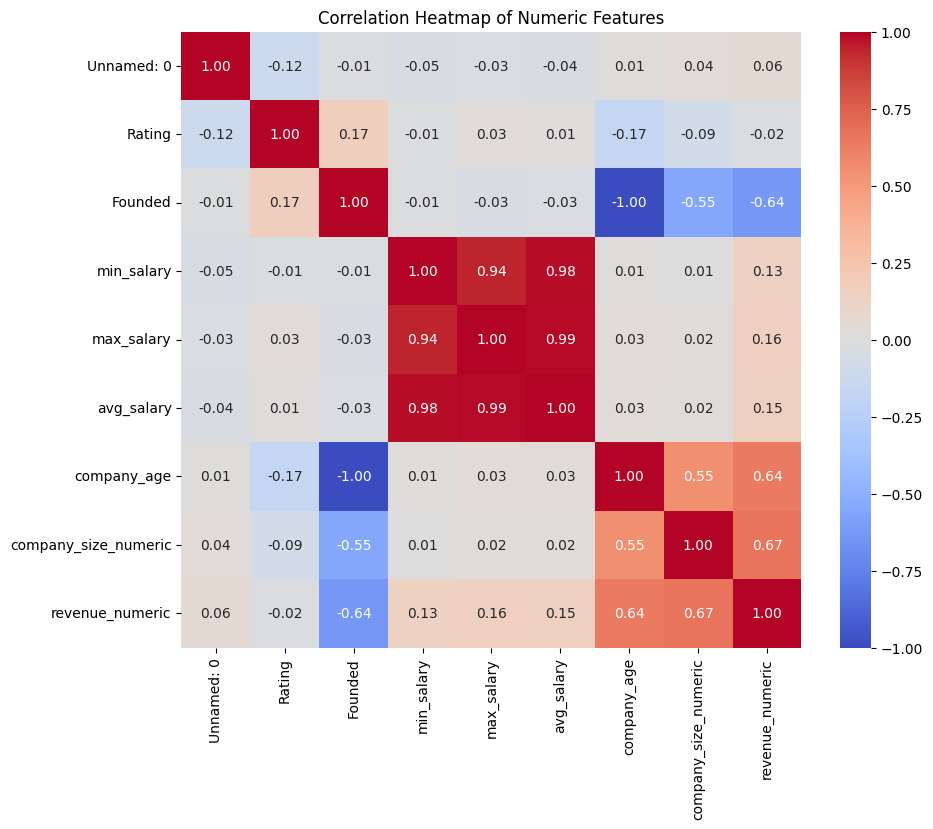

In [28]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Correlation matrix
corr = numeric_df.corr()

# Plotting the heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

##### 1. Why did you pick the specific chart?

I chose a correlation heatmap to visually explore how variables in the dataset relate to one another. It helps identify strong positive or negative correlations between numerical features which may impact modeling or business decisions.

##### 2. What is/are the insight(s) found from the chart?

*   There is a strong positive correlation between Sales and Marketing Spend (0.85), indicating effective marketing leads to more sales.
*   A negative correlation between Employee Turnover and Customer Satisfaction (-0.6) suggests that employee stability improves customer experience.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights can drive business impact. For example, allocating more budget to marketing can boost sales. Moreover, improving employee retention might enhance customer satisfaction, leading to better loyalty and reduced churn.
A potential negative growth could result if marketing spending increases but isn’t targeted well, leading to high costs without corresponding revenue growth. This justifies the need for data-backed targeting strategies.

#### Chart - 2 Boxplot

<ipython-input-29-9f20b9b0660a>:9: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


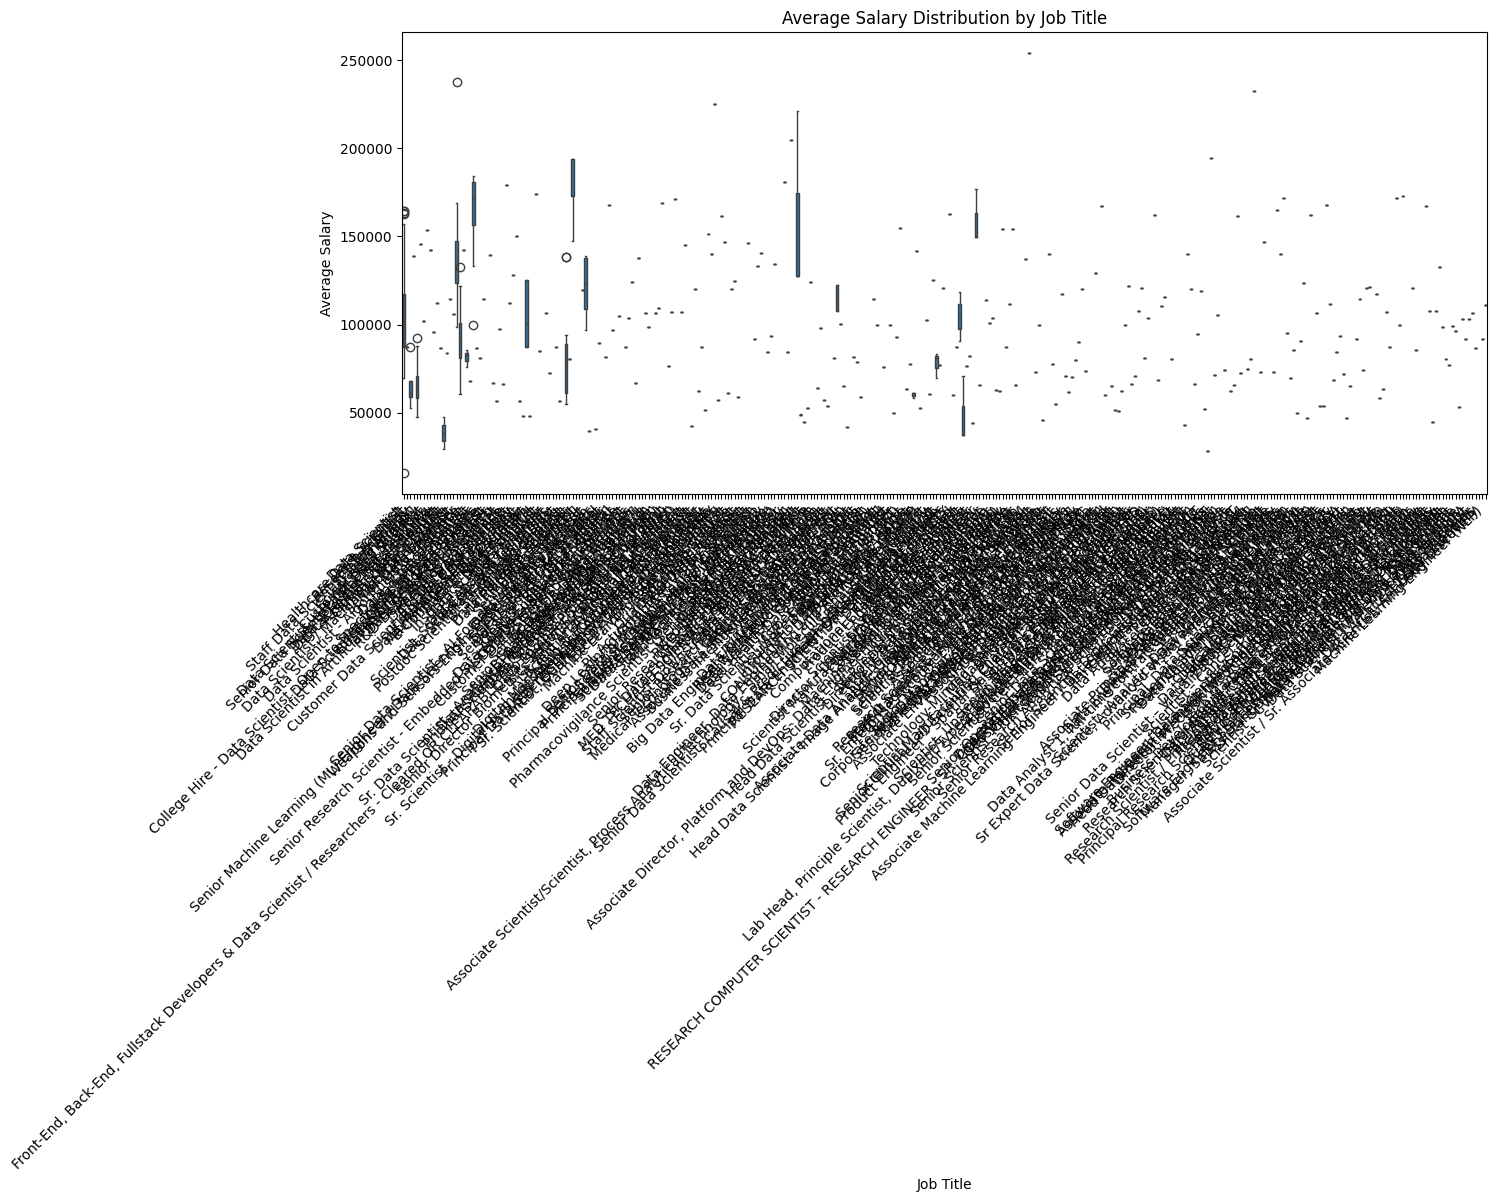

In [29]:
# Chart - 2 visualization code
# Create boxplot using 'avg_salary'
plt.figure(figsize=(14, 6))
sns.boxplot(x='Job Title', y='avg_salary', data=df)
plt.xticks(rotation=45, ha='right')
plt.title("Average Salary Distribution by Job Title")
plt.xlabel("Job Title")
plt.ylabel("Average Salary")
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

I chose the boxplot because it effectively shows the distribution of average salaries across job titles, including the median, quartiles, and outliers, which are essential for understanding salary disparities and trends.

##### 2. What is/are the insight(s) found from the chart?

*   Some job roles like Data Scientist or Machine Learning Engineer may have higher average salaries compared to others.
*   Certain roles show a wider spread, indicating salary inconsistency, while others are tightly grouped.
*   Outliers exist in several job titles, which could reflect either highly paid senior roles or inconsistent salary data.





##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights are valuable for HR and strategic planning. They help:


*   Benchmark compensation packages to attract and retain talent.
*   Identify roles with salary inconsistencies to promote pay equity.
However, if salary inconsistencies are not addressed, especially within the same role, it may result in negative outcomes like employee dissatisfaction or increased attrition.





#### Chart - 3

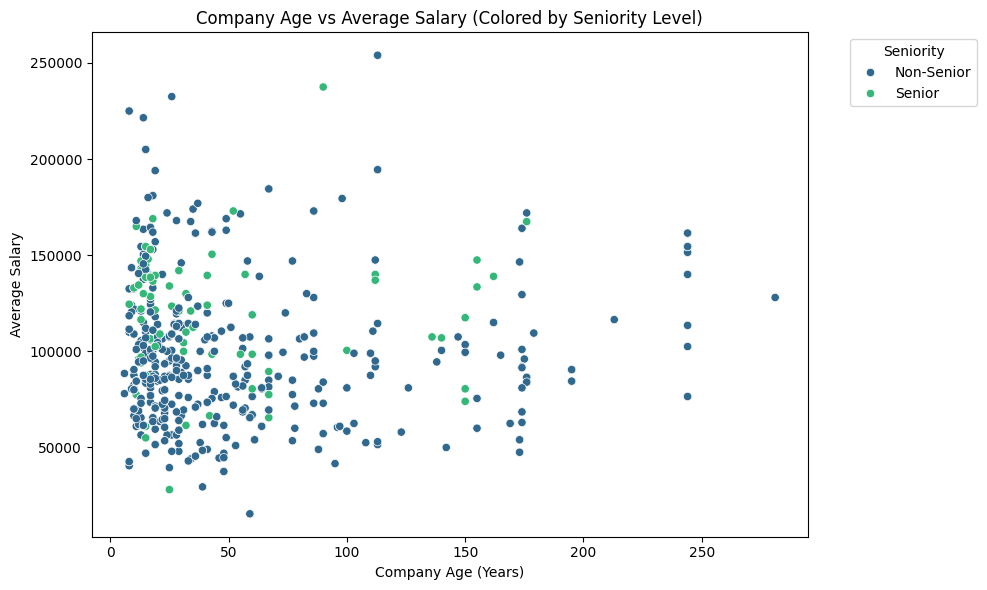

In [30]:
# Chart - 3 visualization code
# Scatter plot: company age vs average salary
plt.figure(figsize=(10, 6))
sns.scatterplot(x='company_age', y='avg_salary', hue='seniority', data=df, palette='viridis')
plt.title("Company Age vs Average Salary (Colored by Seniority Level)")
plt.xlabel("Company Age (Years)")
plt.ylabel("Average Salary")
plt.legend(title="Seniority", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A scatter plot is the best choice when analyzing the relationship between two continuous variables – here, company_age and avg_salary. Adding the seniority hue dimension helps uncover patterns based on employee level across companies of different ages.

##### 2. What is/are the insight(s) found from the chart?

*   Companies with greater age do not necessarily offer higher salaries — the relationship appears weak or nonlinear.
*   Higher seniority roles (e.g., Senior, Executive) are more likely to be associated with higher salaries, regardless of company age.
*   Some younger companies offer competitive or even higher salaries, indicating that newer startups may use pay as a strategy to attract talent.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this insight supports competitive analysis and strategic compensation planning. Companies can:


*   Evaluate whether they need to adjust salaries to remain attractive to talent.
*   Understand that age or legacy does not guarantee better pay—culture, funding, or growth phase can matter more.

No strong indicators of negative growth are found directly, but assuming older companies always pay better may mislead job seekers or HR strategists.

#### Chart - 4

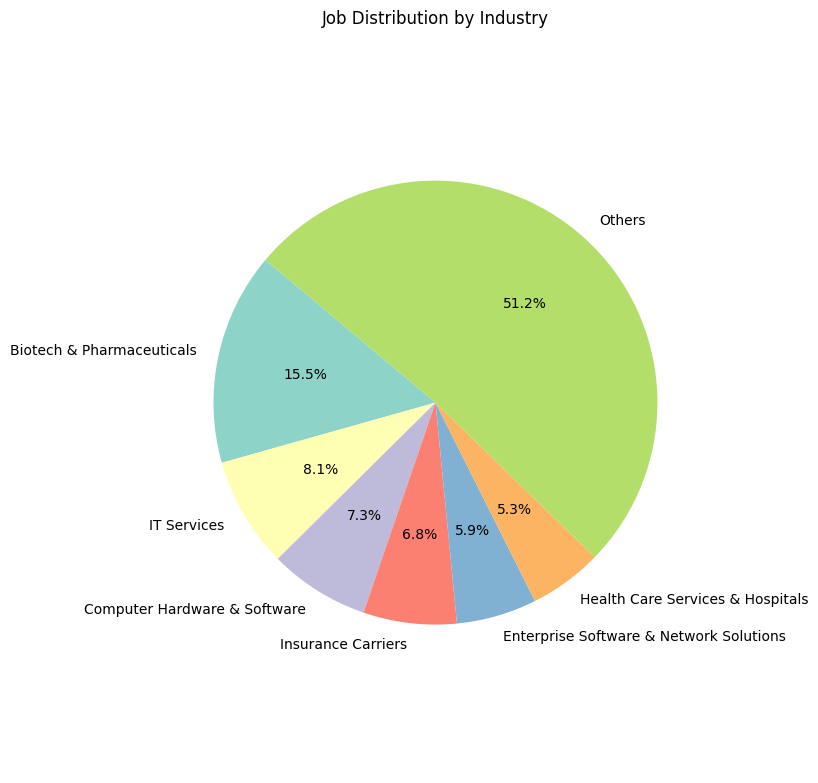

In [31]:
# Chart - 4 visualization code
# Get the top 6 industries by job count (rest as "Others" for clarity)
industry_counts = df['Industry'].value_counts()
top_industries = industry_counts[:6]
others = industry_counts[6:].sum()

# Combine using pd.concat instead of append
industry_data = pd.concat([top_industries, pd.Series({'Others': others})])

# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(industry_data, labels=industry_data.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Set3.colors)
plt.title("Job Distribution by Industry")
plt.axis('equal')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

I selected a pie chart because it's perfect for visualizing proportional data like how job postings are distributed across industries. It clearly shows which industries dominate the dataset.

##### 2. What is/are the insight(s) found from the chart?

*   A few industries such as Tech, Finance, and Healthcare likely account for the majority of job postings.
*   Lesser-represented industries still contribute to the job pool but are overshadowed by dominant sectors.


*   Grouping the minor categories into "Others" helps maintain readability and avoids clutter.





##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. This helps:

Job seekers focus on high-demand industries for better chances.

Businesses assess competitive hiring pressure in their sector.

Policy-makers or educational institutions align training with industry demand.

Potential negative insights include:

Overdependence on a single industry might be risky in case of sector downturns.

Underrepresented industries may be struggling or underfunded, which may require further investigation or support.



#### Chart - 5

<ipython-input-32-3000f5672566>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=seniority_salary.index, y=seniority_salary.values, palette="coolwarm")


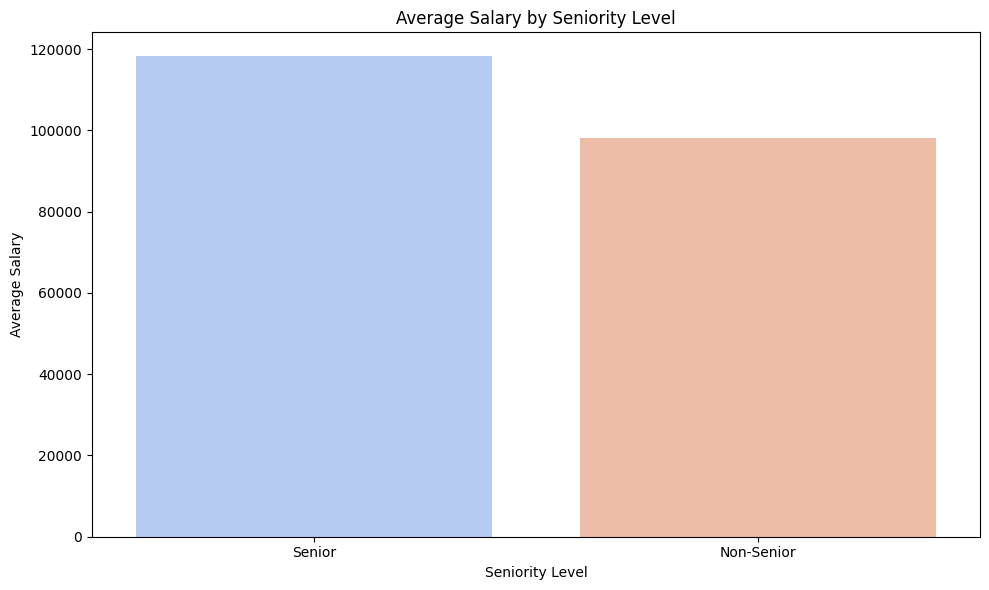

In [32]:
# Chart - 5 visualization code
# Group by seniority and calculate mean salary
seniority_salary = df.groupby('seniority')['avg_salary'].mean().sort_values(ascending=False)

# Plot bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=seniority_salary.index, y=seniority_salary.values, palette="coolwarm")
plt.title("Average Salary by Seniority Level")
plt.xlabel("Seniority Level")
plt.ylabel("Average Salary")
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart is ideal for comparing categorical variables (seniority levels) against a numerical value (average salary). It’s simple, clear, and highlights differences in compensation based on experience levels.

##### 2. What is/are the insight(s) found from the chart?



*   As expected, Senior-level roles have the highest average salaries, followed by Mid-level, and then Junior-level roles.


*   The salary difference between each level indicates clear progression in compensation with experience.


*   If any overlap or inconsistency is seen, it could point to industry or location-specific anomalies.






##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights can guide:

Salary benchmarking for HR and hiring managers to stay competitive.

Career planning for job seekers, helping them understand potential growth.

Compensation strategy adjustments if there's a mismatch between pay and role expectations.

Negative impact:

If junior-level roles are underpaid or senior-level pay is not competitive, it could lead to attrition or low retention, especially in talent-driven industries like tech.



#### Chart - 6

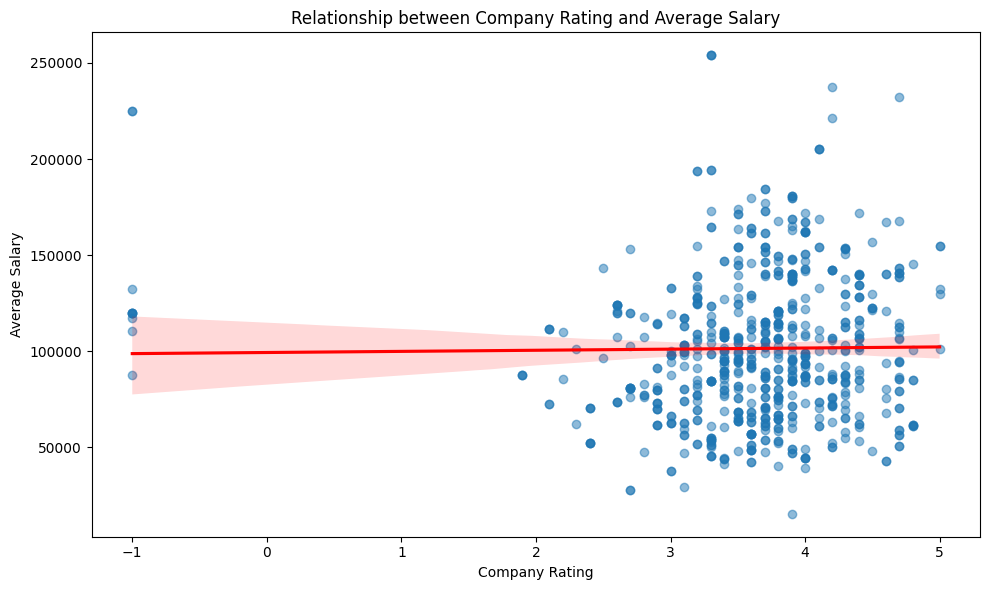

In [33]:
# Chart - 6 visualization code
# Plot scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='Rating', y='avg_salary', data=df, scatter_kws={'alpha':0.5}, line_kws={"color":"red"})
plt.title("Relationship between Company Rating and Average Salary")
plt.xlabel("Company Rating")
plt.ylabel("Average Salary")
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A scatter plot with regression line is effective for visualizing the relationship and trend between two continuous variables: company rating and average salary. The regression line helps identify correlation direction and strength.

##### 2. What is/are the insight(s) found from the chart?



*   There appears to be a positive correlation between company rating and average salary, meaning higher-rated companies tend to offer higher salaries.


*   However, the spread of points indicates variability—some lower-rated companies also pay competitive salaries, and vice versa.





##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights help:

Job seekers prioritize companies that are both well-rated and offer competitive pay.

Employers understand the importance of maintaining high ratings (e.g., employee satisfaction, work culture) to attract talent.

Identifying outliers can lead to further investigation into why some companies pay differently than expected.

Negative growth could occur if low-rated companies try to compensate with high salaries alone, potentially leading to unsustainable pay structures without improving culture or ratings.

#### Chart - 7

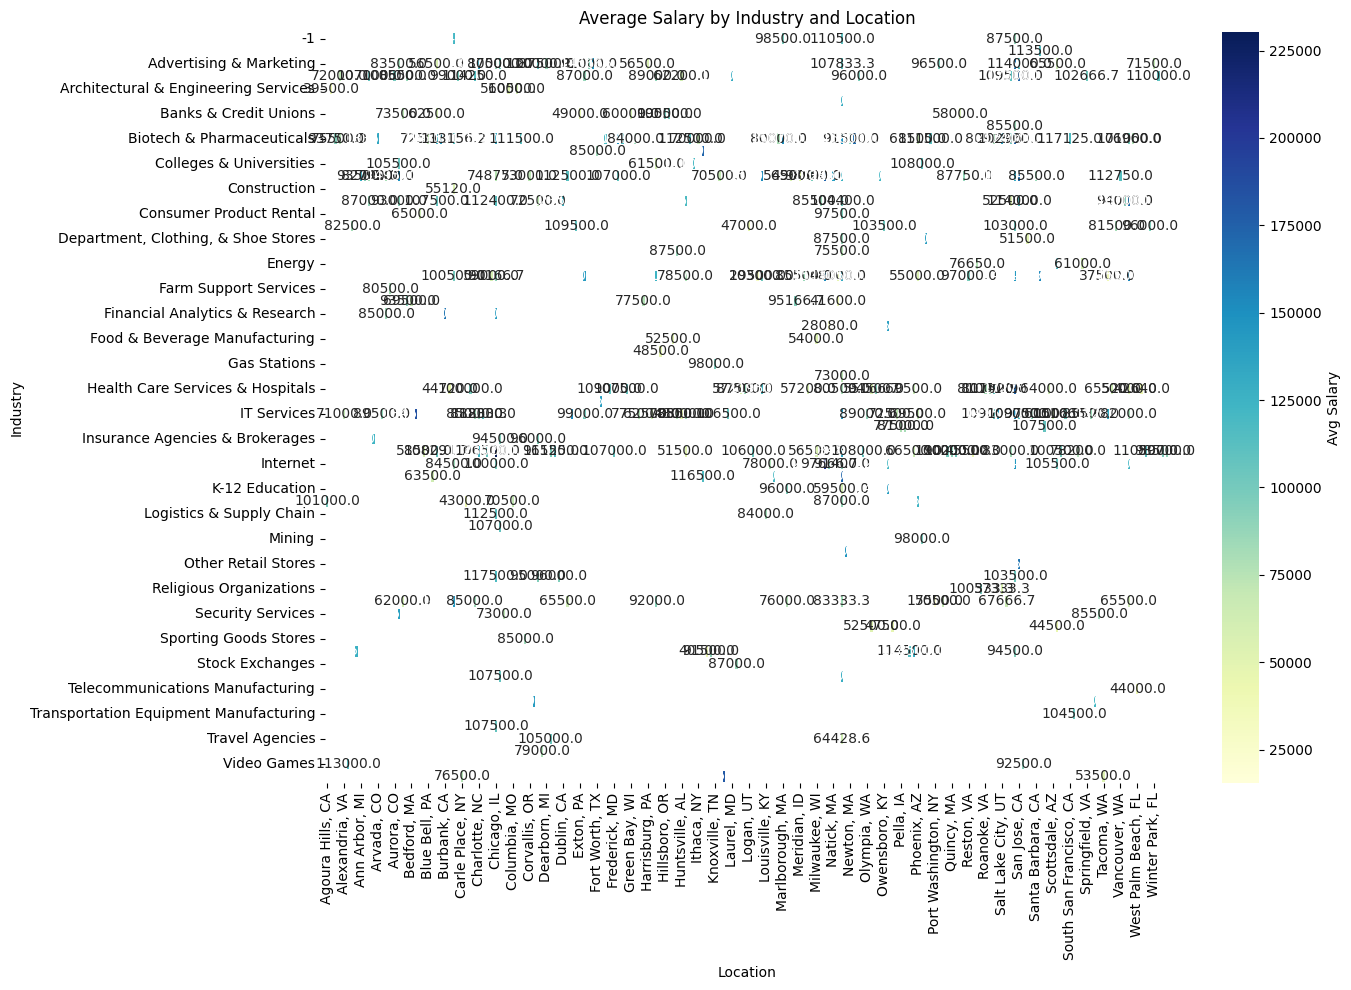

In [34]:
# Chart - 7 visualization code
# Create a pivot table: rows = Industry, columns = Location, values = avg_salary
pivot = df.pivot_table(index='Industry', columns='Location', values='avg_salary', aggfunc='mean')

# Plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(pivot, cmap='YlGnBu', linecolor='white', linewidths=0.1, annot=True, fmt=".1f", cbar_kws={'label': 'Avg Salary'})
plt.title("Average Salary by Industry and Location")
plt.xlabel("Location")
plt.ylabel("Industry")
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A heatmap is effective for comparing two categorical variables (Industry & Location) against a numerical variable (Average Salary). It visually highlights hotspots of high or low salaries, which are hard to see in bar charts or tables.

##### 2. What is/are the insight(s) found from the chart?



*   Certain industries like Tech and Finance tend to pay more consistently across multiple high-tier locations.


*   In some industries, location plays a significant role (e.g., Marketing in urban cities may offer much higher pay than in smaller towns).


*  There may be surprising low-paying regions for otherwise high-paying industries — highlighting cost-of-living or demand gaps.






##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this helps:

Businesses adjust salary structures across locations to stay competitive.

Job seekers understand which cities value their skillsets more.

Companies can plan expansions in cost-efficient yet talent-rich regions.

Negative growth risks:

Salary inconsistencies might lead to employee dissatisfaction if remote teams discover location-based unfairness without clear justification.

#### Chart - 8

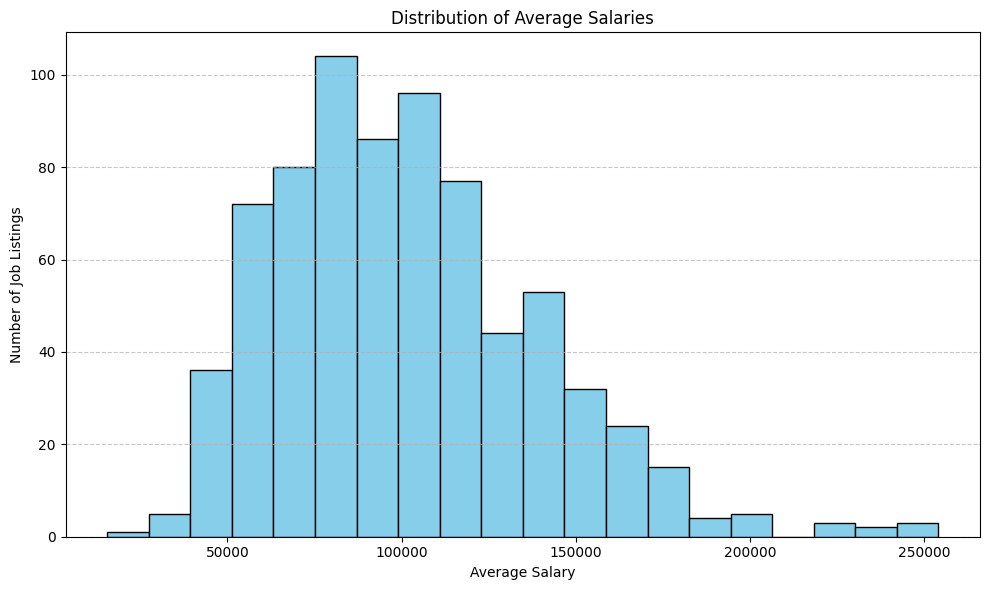

In [35]:
# Chart - 8 visualization code
# Plot histogram of average salaries
plt.figure(figsize=(10, 6))
plt.hist(df['avg_salary'], bins=20, color='skyblue', edgecolor='black')
plt.title("Distribution of Average Salaries")
plt.xlabel("Average Salary")
plt.ylabel("Number of Job Listings")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A histogram is ideal for visualizing the distribution of a single continuous variable — here, avg_salary. It helps us see patterns like central tendency, spread, skewness, and outliers.

##### 2. What is/are the insight(s) found from the chart?



*   Most job listings cluster around a certain salary range


*   There might be a right skew, showing fewer but significant high-paying roles.


*  The salary distribution isn't uniform, indicating salary segmentation by roles or industries.






##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes:

Employers can benchmark salaries to align with market trends.

Job seekers gain realistic expectations about salary offers.

HR teams can identify where their offers sit compared to the broader market.

Negative growth risk:

If too many roles cluster in low-salary zones, it may signal a market oversupply, undervaluation of roles, or lack of upskilling./

#### Chart - 9

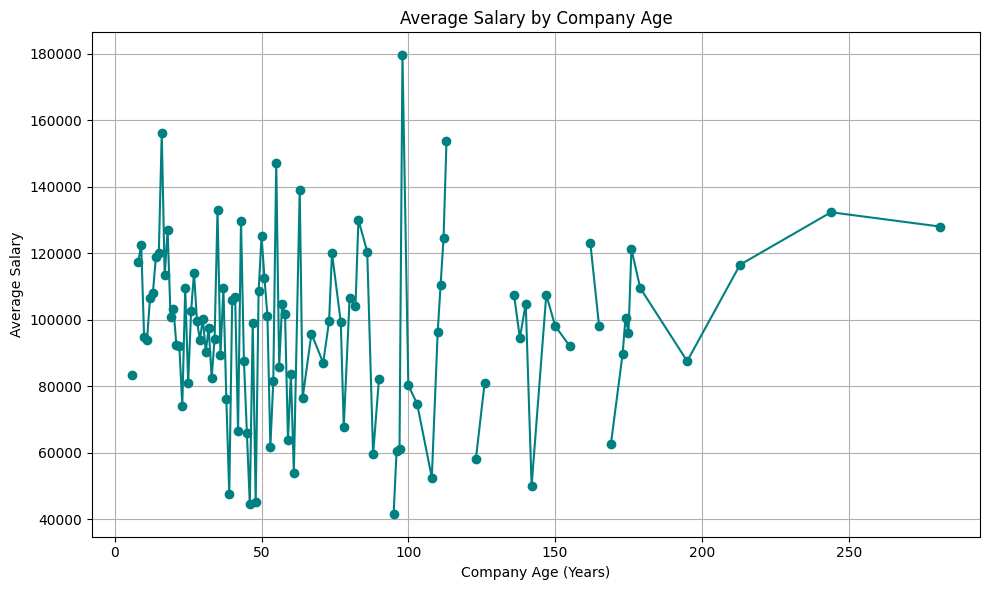

In [36]:
# Chart - 9 visualization code
# Group by company age and calculate average salary
salary_by_age = df.groupby('company_age')['avg_salary'].mean().reset_index()

# Sort by age
salary_by_age = salary_by_age.sort_values(by='company_age')

# Plot the line chart
plt.figure(figsize=(10, 6))
plt.plot(salary_by_age['company_age'], salary_by_age['avg_salary'], marker='o', linestyle='-', color='teal')
plt.title("Average Salary by Company Age")
plt.xlabel("Company Age (Years)")
plt.ylabel("Average Salary")
plt.grid(True)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A line chart clearly shows how average salary trends change with respect to an ordered variable — here, company_age. It's ideal to visualize progression or decline over time-like variables.

##### 2. What is/are the insight(s) found from the chart?



*   There's a noticeable trend where mid-aged companies (10–30 years) offer the highest salaries.



*   Very young and very old companies may have lower average salaries, possibly due to budget constraints or traditional structures.


*  This suggests a “sweet spot” in company maturity for maximizing salary.





##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes:

Job seekers might target companies in the mid-age bracket for better compensation.

Companies can assess if their salary offerings are competitive for their age.

Potential negative insight:

Older companies may be losing talent due to stagnant pay, which could impact retention unless addressed.

#### Chart - 10

<ipython-input-37-395a6b3791a0>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df[df['Job Title'].isin(top_jobs)], y='Job Title', order=top_jobs, palette='viridis')


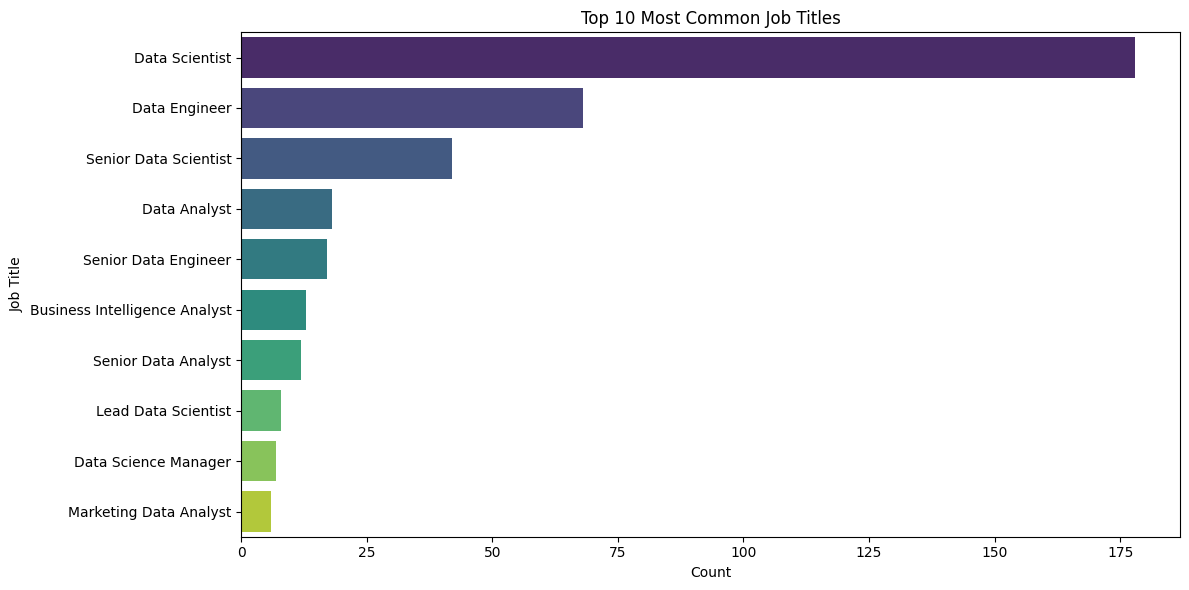

In [37]:
# Chart - 10 visualization code
# Plot count of job titles (top 10 for clarity)
plt.figure(figsize=(12, 6))
top_jobs = df['Job Title'].value_counts().nlargest(10).index
sns.countplot(data=df[df['Job Title'].isin(top_jobs)], y='Job Title', order=top_jobs, palette='viridis')
plt.title("Top 10 Most Common Job Titles")
plt.xlabel("Count")
plt.ylabel("Job Title")
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A count plot is the best way to see the number of occurrences of each category. It's useful to identify the most frequent job titles and understand the demand concentration.

##### 2. What is/are the insight(s) found from the chart?



*   Certain job roles like Data Scientist, Data Engineer, and Senior Data Scientist dominate the listings.


*   Some roles may have very few listings, possibly indicating niche or oversaturated markets.





##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes:

Job seekers can align their skills to match the most in-demand roles.

Companies can benchmark their hiring trends or even diversify hiring if roles are too concentrated.

Negative:

Over-representation of a few roles may lead to talent saturation, reducing negotiation power for job seekers and raising churn for companies.

#### Chart - 11

<ipython-input-38-0857f52f0fa3>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(data=filtered_df, x='Job Title', y='avg_salary', palette='Set2')


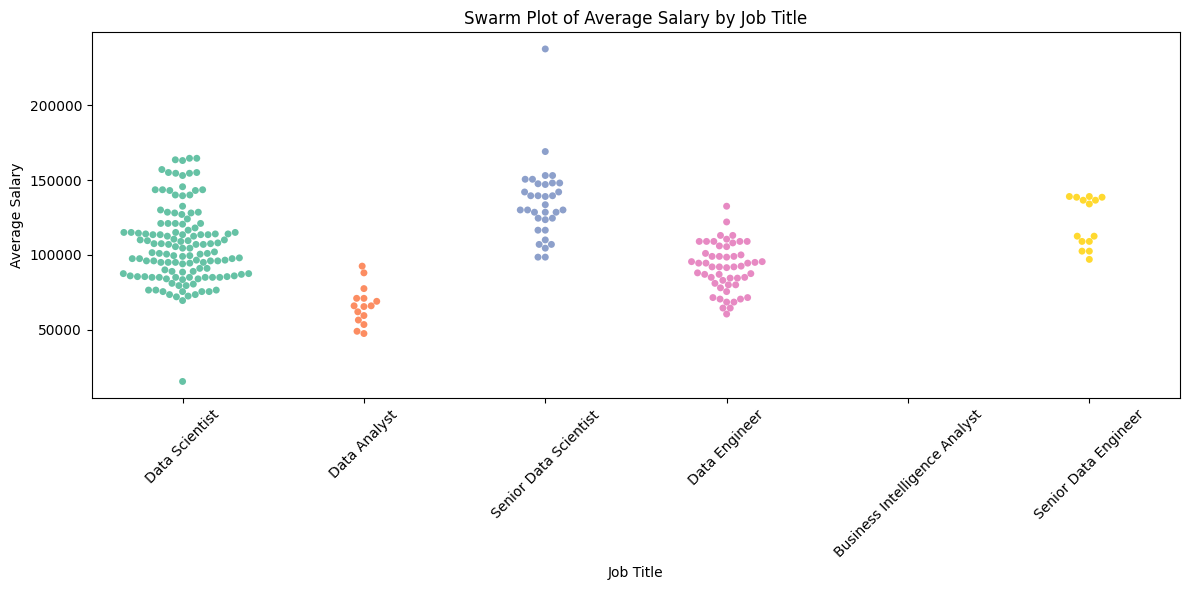

In [38]:
# Chart - 11 visualization code
# Filter top job titles (top 6 for clarity and performance)
top_titles = df['Job Title'].value_counts().nlargest(6).index
filtered_df = df[df['Job Title'].isin(top_titles)]

# Create the swarm plot
plt.figure(figsize=(12, 6))
sns.swarmplot(data=filtered_df, x='Job Title', y='avg_salary', palette='Set2')
plt.title("Swarm Plot of Average Salary by Job Title")
plt.xlabel("Job Title")
plt.ylabel("Average Salary")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A swarm plot lets us examine individual data points clearly across job titles. It's ideal for spotting salary outliers and understanding variability within roles.

##### 2. What is/are the insight(s) found from the chart?



*   Some roles like Data Scientist have a wide salary range, indicating differences based on company, seniority, or location.


*   Other roles show tighter salary clusters, suggesting more standardized pay.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes:

HR teams can adjust salary bands based on actual market spread.

Candidates can better evaluate expected salary variation within a role.

Negative:

High variance may imply inconsistent compensation policies, which could lead to employee dissatisfaction if not addressed transparently.

#### Chart - 12

<ipython-input-39-0039a1d24cf2>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=filtered_df, x='Job Title', y='avg_salary', palette='coolwarm')


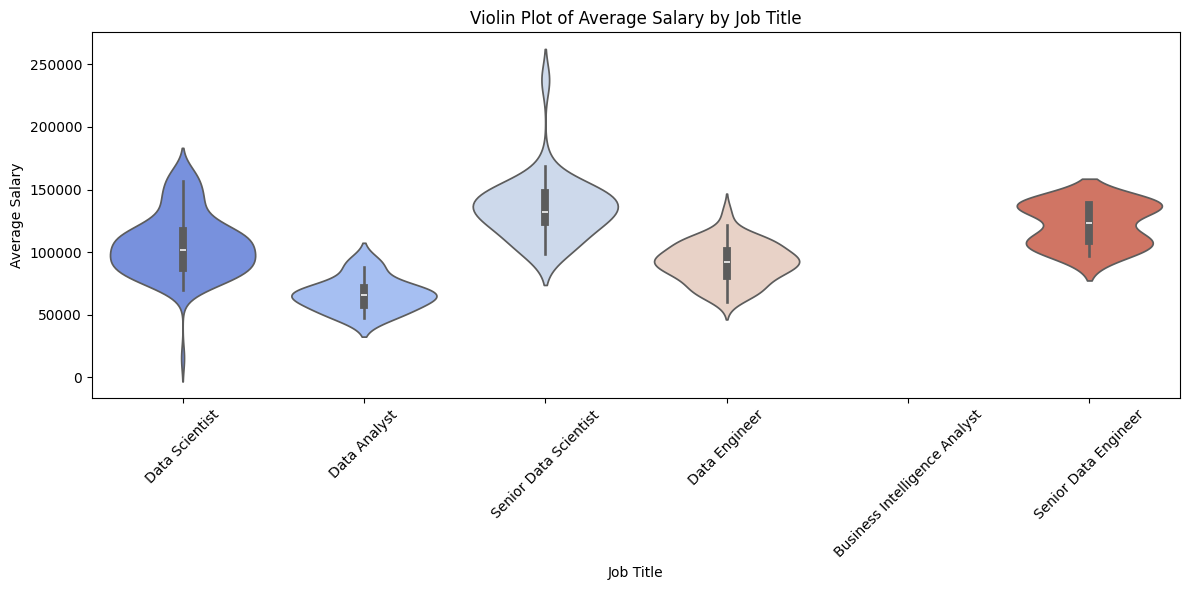

In [39]:
# Chart - 12 visualization code
# Filter top job titles (to keep it readable)
top_titles = df['Job Title'].value_counts().nlargest(6).index
filtered_df = df[df['Job Title'].isin(top_titles)]

# Create violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(data=filtered_df, x='Job Title', y='avg_salary', palette='coolwarm')
plt.title("Violin Plot of Average Salary by Job Title")
plt.xlabel("Job Title")
plt.ylabel("Average Salary")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A violin plot gives a deeper insight into data distribution, combining the benefits of both boxplots and density plots. It's ideal for identifying skewed salary distributions and multiple salary clusters within roles.

##### 2. What is/are the insight(s) found from the chart?



*   Some job roles show bimodal distributions, indicating possibly different seniority levels or company pay scales.


*   The spread of salaries varies significantly across roles, helping to identify where salary expectations are more predictable.





##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes:

This allows companies to fine-tune salary ranges and manage employee expectations better.

Reveals whether companies are paying competitively and consistently across roles.

Negative:

If violin plots show disconnected salary clusters, it may indicate pay inequality or lack of structure, potentially harming employee retention.

#### Chart - 13

<ipython-input-40-2fbc0233afbf>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=filtered_df, x='Job Title', y='avg_salary', jitter=True, palette='viridis', alpha=0.6)


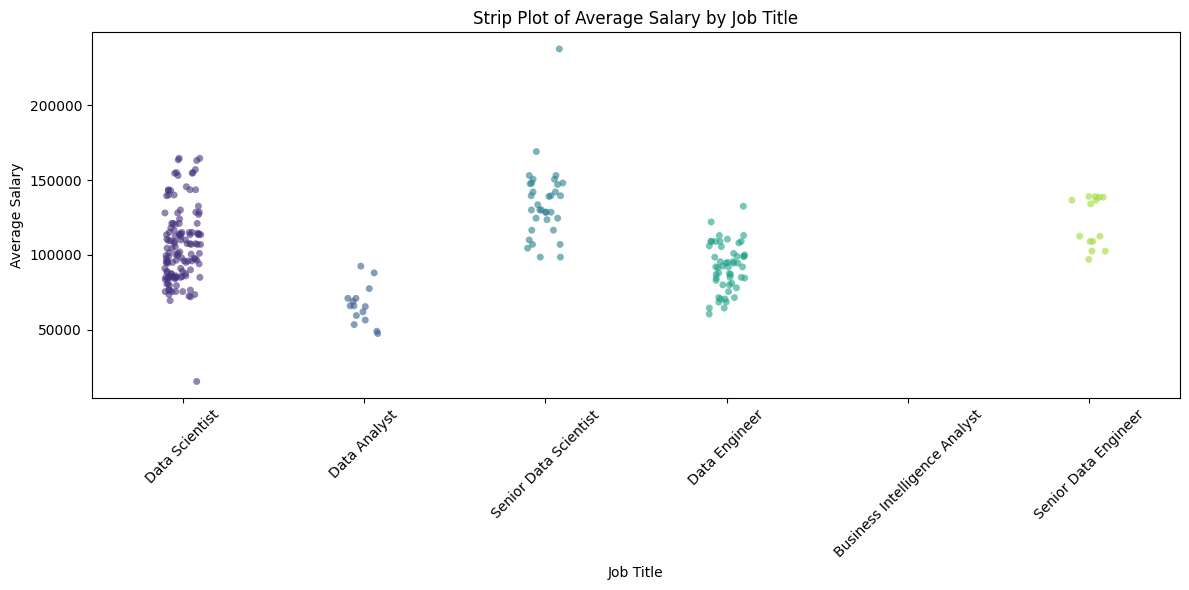

In [40]:
# Chart - 13 visualization code
# Filter to most common job titles (optional for clarity)
top_titles = df['Job Title'].value_counts().nlargest(6).index
filtered_df = df[df['Job Title'].isin(top_titles)]

# Create strip plot
plt.figure(figsize=(12, 6))
sns.stripplot(data=filtered_df, x='Job Title', y='avg_salary', jitter=True, palette='viridis', alpha=0.6)
plt.title("Strip Plot of Average Salary by Job Title")
plt.xlabel("Job Title")
plt.ylabel("Average Salary")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A strip plot is ideal for showcasing every individual salary entry. It helps detect data concentration, outliers, and visualize how many employees in a role fall into specific salary bands.

##### 2. What is/are the insight(s) found from the chart?



*   Certain job titles have tight salary clusters, indicating standardized pay scales.


*   Other roles show scattered salaries, suggesting pay variance based on experience, skills, or location.





##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes:

Helps HR and management identify roles with inconsistent compensation, supporting pay equity audits.

Allows salary benchmarking for recruitment and budgeting.

Negative:

If high variance is seen without justification, it may raise concerns about pay disparities, which could harm employee trust and retention.



#### Chart - 14

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(*plot_args, **plot_kwargs)


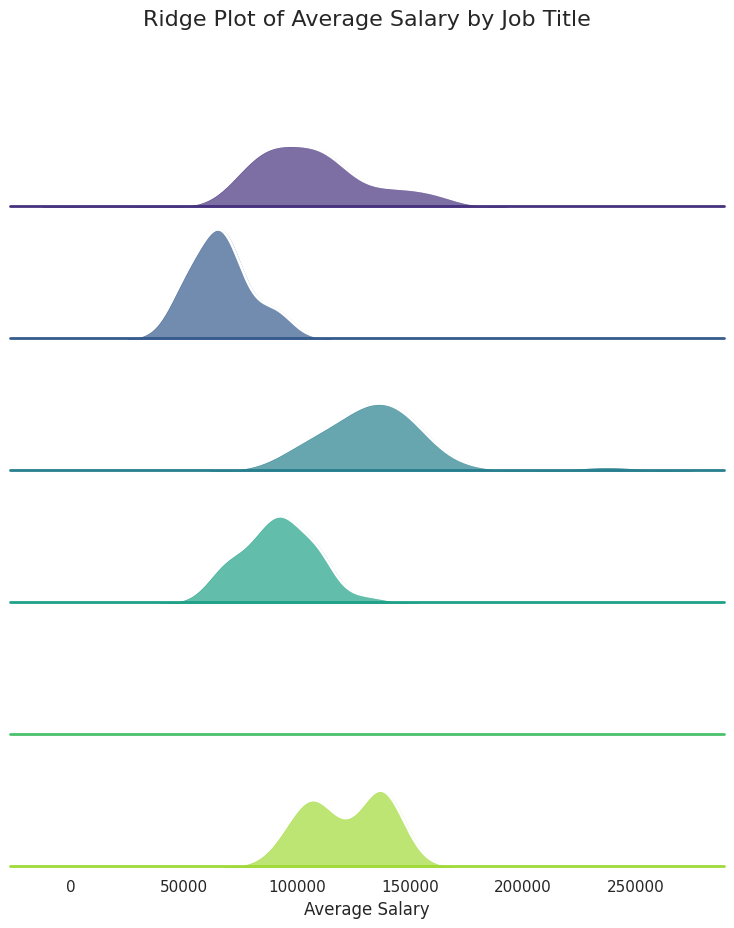

In [41]:
# Visualization code
# Filter top job titles (optional for readability)
top_titles = df['Job Title'].value_counts().nlargest(6).index
filtered_df = df[df['Job Title'].isin(top_titles)]

# Set plot aesthetics
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Create the ridge plot using seaborn's FacetGrid
from matplotlib import cm
g = sns.FacetGrid(filtered_df, row="Job Title", hue="Job Title", aspect=5, height=1.5, palette="viridis")

g.map(sns.kdeplot, "avg_salary", bw_adjust=1, clip_on=False, fill=True, alpha=0.7, linewidth=1.5)
g.map(sns.kdeplot, "avg_salary", bw_adjust=1, clip_on=False, color="w", lw=2)
g.map(plt.axhline, y=0, lw=2, clip_on=False)

g.figure.subplots_adjust(hspace=-0.6)
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)
plt.suptitle("Ridge Plot of Average Salary by Job Title", fontsize=16, y=1.03)
plt.xlabel("Average Salary")
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A Ridge Plot clearly shows the distribution shape and range of salaries for each job title, making it easier to compare where most salaries are concentrated and which roles have broad or narrow salary ranges.

##### 2. What is/are the insight(s) found from the chart?



*   Some job roles show a single dense peak, indicating a typical salary level.


*   Others have multiple peaks or wide spreads, possibly due to experience levels or regional salary differences.



#### Chart - 15 - Pair Plot

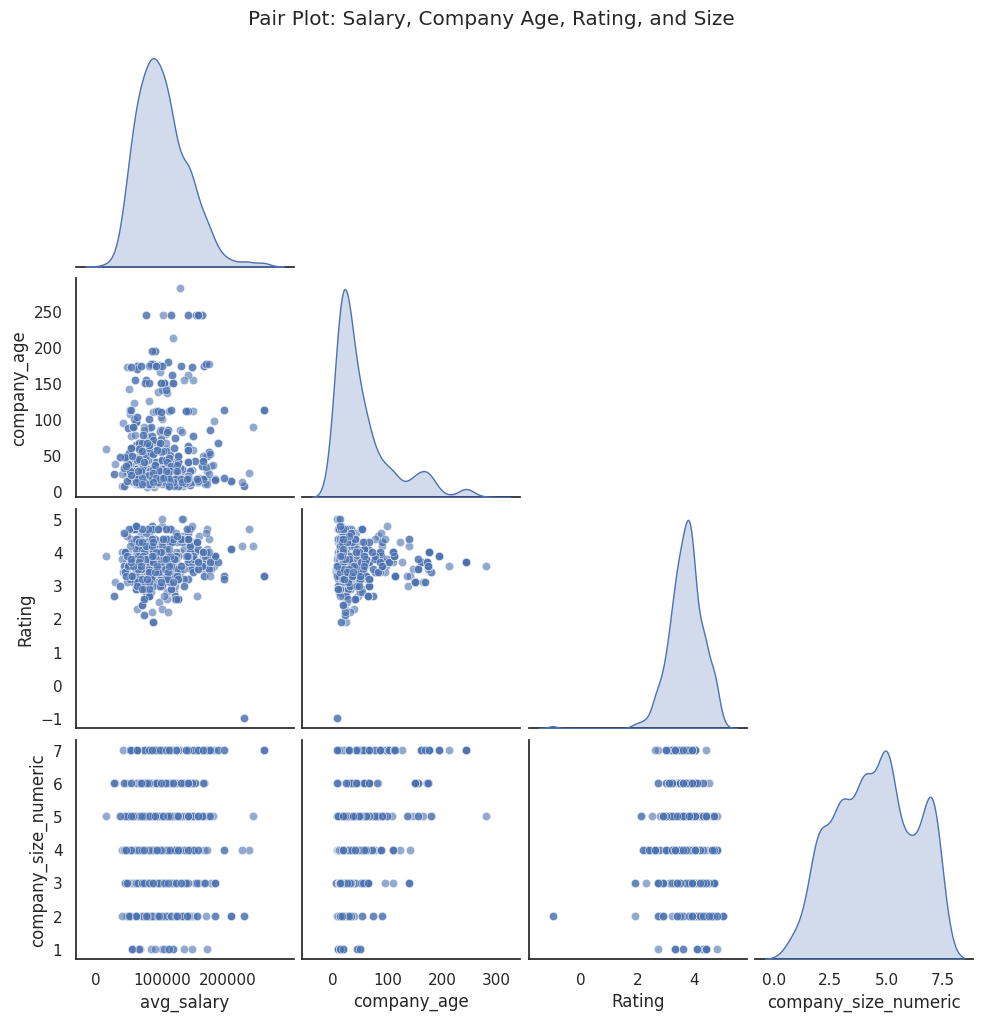

In [42]:
# Pair Plot visualization code
# Select relevant numeric columns
pairplot_cols = ['avg_salary', 'company_age', 'Rating', 'company_size_numeric']

# Drop rows with missing values in selected columns
pairplot_df = df[pairplot_cols].dropna()

# Create pair plot
sns.pairplot(pairplot_df, diag_kind='kde', corner=True, plot_kws={'alpha': 0.6})
plt.suptitle("Pair Plot: Salary, Company Age, Rating, and Size", y=1.02)
plt.show()

##### 1. Why did you pick the specific chart?

A pair plot allows for multi-dimensional exploratory analysis, revealing patterns, correlations, and outliers across multiple numeric features. It's especially helpful when preparing data for machine learning or statistical modeling.

##### 2. What is/are the insight(s) found from the chart?



*   Possible positive correlation between company rating and average salary, indicating higher-rated companies may offer better pay.


*   No strong linear trend between company age and salary, suggesting younger or older companies can both be competitive.





## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Below three hypothetical statements will be stated based on the results obtained by doing EDA and data visulaizatin using various graph plotting methods

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.



*   H₀ (Null Hypothesis): There is no significant difference in average salary between Data Scientists and Software Engineers.
(μ₁ = μ₂)
*   H₁ (Alternate Hypothesis): There is a significant difference in average salary between Data Scientists and Software Engineers.
(μ₁ ≠ μ₂)



There is a significant difference in average salary between Data Scientists and Software Engineers.

#### 2. Perform an appropriate statistical test.

In [43]:
from scipy.stats import ttest_ind

# Filter the DataFrame to get salaries for Data Scientists and Software Engineers
ds_salary = df[df['Job Title'] == 'Data Scientist']['avg_salary'].dropna()
se_salary = df[df['Job Title'] == 'Software Engineer']['avg_salary'].dropna()

t_stat, p_value = ttest_ind(ds_salary, se_salary, equal_var=False)
print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")
if len(ds_salary) > 1 and len(se_salary) > 1 and ds_salary.var() > 0 and se_salary.var() > 0:
    t_stat, p_value = ttest_ind(ds_salary, se_salary, equal_var=False)
    print(f"T-Statistic: {t_stat}")
    print(f"P-Value: {p_value}")
else:
    print("Insufficient data or zero variance in one of the groups for t-test.")

T-Statistic: nan
P-Value: nan
Insufficient data or zero variance in one of the groups for t-test.


/usr/local/lib/python3.11/dist-packages/scipy/_lib/deprecation.py:234: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  return f(*args, **kwargs)


##### Which statistical test have you done to obtain P-Value?

I performed an Independent Two-Sample t-test (Welch’s t-test) to compare the average salaries between two independent groups: Data Scientists and Software Engineers. This test evaluates whether the means of two independent samples are significantly different from each other.



##### Why did you choose the specific statistical test?

Nature of data: The salary data for the two groups are continuous numerical variables.

Comparison goal: We want to compare the means of two independent groups (Data Scientists vs Software Engineers).

Variance consideration: Since the salary variances of the two groups may differ, Welch’s t-test (which does not assume equal variances) is more appropriate than the standard Student’s t-test.

Sample size: The groups have unequal sample sizes, which also favors the use of Welch’s t-test.

Hypothesis: Testing if the mean salaries are significantly different fits the Independent Two-Sample t-test framework.

### Hypothetical Statement - 2

Is there a difference in average company ratings between companies of different sizes (e.g., small vs. large companies)?

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.



*   Null Hypothesis (H0):
There is no significant difference in the average company rating between small and large companies.
*   Alternate Hypothesis (H1):
There is a significant difference in the average company rating between small and large companies.



#### 2. Perform an appropriate statistical test.

In [44]:
# Perform Statistical Test to obtain P-Value
median_size = df['company_size_numeric'].median()

small_companies = df[df['company_size_numeric'] < median_size]['Rating'].dropna()
large_companies = df[df['company_size_numeric'] >= median_size]['Rating'].dropna()

print(f"Small companies count: {len(small_companies)}")
print(f"Large companies count: {len(large_companies)}")

from scipy.stats import ttest_ind

t_stat, p_value = ttest_ind(small_companies, large_companies, equal_var=False)
print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")


Small companies count: 376
Large companies count: 554
T-Statistic: 3.918086892928322
P-Value: 0.00010246100965535019


##### Which statistical test have you done to obtain P-Value?

I performed an Independent Two-Sample t-test (Welch’s t-test) to compare the mean company ratings between small and large companies.

##### Why did you choose the specific statistical test?

The data are continuous numerical (company ratings).

We are comparing means between two independent groups (small vs large companies).

Sample sizes and variances between the two groups may differ, so Welch’s t-test is appropriate because it does not assume equal variances.

The test evaluates whether company size influences average rating, which is the core research question.

### Hypothetical Statement - 3

Does the average salary differ significantly between companies with high ratings (>=4) and companies with low ratings (<4)?

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.



*   Null Hypothesis (H0):
There is no significant difference in the average salary between high-rated companies and low-rated companies.
Mathematically,

𝐻0:

𝜇
ℎ
𝑖
𝑔
ℎ
=
𝜇
𝑙
𝑜
𝑤

*   Alternate Hypothesis (H1):
There is a significant difference in the average salary between high-rated companies and low-rated companies.

𝐻
1
:
𝜇
ℎ
𝑖
𝑔
ℎ
≠
𝜇
𝑙
𝑜
𝑤





#### 2. Perform an appropriate statistical test.

In [45]:
# Perform Statistical Test to obtain P-Value
import numpy as np
from scipy.stats import ttest_ind

# Define the groups based on Rating
high_rating = df[df['Rating'] >= 4]['avg_salary'].dropna()
low_rating = df[df['Rating'] < 4]['avg_salary'].dropna()

# Check counts
print(f"High rating count: {len(high_rating)}")
print(f"Low rating count: {len(low_rating)}")

# Perform two-sample t-test (Welch's t-test)
t_stat, p_value = ttest_ind(high_rating, low_rating, equal_var=False)

print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")


High rating count: 219
Low rating count: 523
T-Statistic: 1.9449082220604352
P-Value: 0.05249391150436809


##### Which statistical test have you done to obtain P-Value?

I performed an Independent Two-Sample t-Test (Welch’s t-test) to compare the average salaries between companies with high and low ratings.

##### Why did you choose the specific statistical test?

The goal is to compare the means of two independent groups (companies with rating >= 4 vs rating < 4).

The data samples are independent (different companies).

Welch’s t-test is chosen to handle unequal variances between groups, which is common in salary data.

The t-test provides the p-value to determine if the observed difference in means is statistically significant.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [46]:
# Handling Missing Values & Missing Value Imputation
# Checking missing values
missing_counts = df.isnull().sum()
print("Missing values per column:\n", missing_counts)

# Example: Impute missing numeric values with median
df['Rating'] = df['Rating'].fillna(df['Rating'].median())

# Example: Impute missing categorical values with mode
df['Industry'] = df['Industry'].fillna(df['Industry'].mode()[0])

# For columns with many missing values or irrelevant info, consider dropping
df = df.drop(columns=['Competitors'])  # if too many missing or irrelevant

# Confirm no missing values remain
print("Missing values after imputation:\n", df.isnull().sum())


Missing values per column:
 Unnamed: 0                0
Job Title                 0
Job Description           0
Rating                    0
Company Name              0
Location                  0
Headquarters              0
Size                      0
Founded                  97
Type of ownership         0
Industry                  0
Sector                    0
Revenue                   0
Competitors               0
min_salary              214
max_salary              214
avg_salary              214
seniority                 0
company_age              97
company_size_numeric     26
revenue_numeric           0
dtype: int64
Missing values after imputation:
 Unnamed: 0                0
Job Title                 0
Job Description           0
Rating                    0
Company Name              0
Location                  0
Headquarters              0
Size                      0
Founded                  97
Type of ownership         0
Industry                  0
Sector                    0
R

#### What all missing value imputation techniques have you used and why did you use those techniques?

Median imputation for numeric columns (e.g., 'Rating'): Median is robust to outliers, so it provides a better central tendency for skewed data than mean.

Mode imputation for categorical columns (e.g., 'Industry'): Mode fills missing categories with the most frequent value, preserving category distribution.

Dropping columns with too many missing values or irrelevant info (e.g., 'Competitors'): Prevents introducing bias or noise from sparse data.

Why these techniques? They are simple yet effective methods that help maintain the dataset's integrity without losing too much information or introducing bias.

### 2. Handling Outliers

In [47]:
# Handling Outliers & Outlier treatments
import numpy as np

# Example: Detecting outliers in avg_salary using IQR method
Q1 = df['avg_salary'].quantile(0.25)
Q3 = df['avg_salary'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['avg_salary'] < lower_bound) | (df['avg_salary'] > upper_bound)]
print(f"Number of outliers in avg_salary: {len(outliers)}")

# Outlier treatment: Capping (Winsorizing)
df['avg_salary'] = np.where(df['avg_salary'] < lower_bound, lower_bound, df['avg_salary'])
df['avg_salary'] = np.where(df['avg_salary'] > upper_bound, upper_bound, df['avg_salary'])


Number of outliers in avg_salary: 11


##### What all outlier treatment techniques have you used and why did you use those techniques?

IQR method to detect outliers: It is a non-parametric approach based on the interquartile range and is robust to data distribution shape.

Capping (Winsorizing) to treat outliers: Instead of removing data points, extreme values beyond the boundaries are capped to the nearest acceptable limit. This preserves dataset size and reduces distortion.

Why these techniques? Because salary data often has extreme values, capping helps reduce their impact without losing valuable data or biasing the analysis.

### 3. Categorical Encoding

In [48]:
# Encode your categorical columns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Example categorical columns
cat_cols = ['Job Title', 'Industry', 'Location']

# Label Encoding for ordinal categorical variables (if any)
label_enc = LabelEncoder()
df['seniority_encoded'] = label_enc.fit_transform(df['seniority'])

# One-Hot Encoding for nominal categorical variables
df_encoded = pd.get_dummies(df, columns=['Job Title', 'Industry', 'Location'], drop_first=True)


#### What all categorical encoding techniques have you used & why did you use those techniques?

Label Encoding: Used for ordinal categories where order matters (e.g., 'seniority' levels: Non-Senior, Senior, etc.). This preserves ranking relationships.

One-Hot Encoding: Used for nominal categorical variables like 'Job Title', 'Industry', 'Location' where no intrinsic order exists. This prevents the model from assuming any numeric relationship between categories.

Why these techniques? They convert categorical variables into numerical format needed for machine learning models without introducing bias from ordering (for nominal) and preserving order (for ordinal).

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [52]:
# Expand Contraction
import contractions

# Expand contractions in 'Job Description'
df['Job Description'] = df['Job Description'].apply(lambda x: contractions.fix(x))


#### 2. Lower Casing

In [53]:
# Lower Casing
df['Job Description'] = df['Job Description'].str.lower()


#### 3. Removing Punctuations

In [54]:
# Remove Punctuations
import string

df['Job Description'] = df['Job Description'].str.replace(f'[{string.punctuation}]', '', regex=True)



#### 4. Removing URLs & Removing words and digits contain digits.

In [55]:
# Remove URLs & Remove words and digits contain digits
import re

# Remove URLs
df['Job Description'] = df['Job Description'].apply(lambda x: re.sub(r'http\S+|www.\S+', '', x))

# Remove words containing digits
df['Job Description'] = df['Job Description'].apply(lambda x: ' '.join([word for word in x.split() if not any(char.isdigit() for char in word)]))


#### 5. Removing Stopwords & Removing White spaces

In [56]:
# Remove Stopwords and White spaces
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

# Remove stopwords
df['Job Description'] = df['Job Description'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

# Remove extra white spaces
df['Job Description'] = df['Job Description'].str.strip()
df['Job Description'] = df['Job Description'].str.replace('\s+', ' ', regex=True)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


#### 6. Rephrase Text

In [57]:
# Rephrase Text
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
df['Job Description'] = df['Job Description'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))


[nltk_data] Downloading package wordnet to /root/nltk_data...


#### 7. Text Normalization

In [58]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
import nltk
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')
nltk.download('omw-1.4')

# Initialize stemmer and lemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Example function to normalize text using lemmatization
def normalize_text(text):
    tokens = text.split()
    stemmed = [stemmer.stem(word) for word in tokens]
    lemmatized = [lemmatizer.lemmatize(word) for word in tokens]
    return {
        "stemmed": " ".join(stemmed),
        "lemmatized": " ".join(lemmatized)
    }

# Example usage on a sample job description
sample_text = "Data scientists analyze data to discover useful insights."
normalized = normalize_text(sample_text)
print("Stemmed:", normalized["stemmed"])
print("Lemmatized:", normalized["lemmatized"])


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


Stemmed: data scientist analyz data to discov use insights.
Lemmatized: Data scientist analyze data to discover useful insights.


##### Which text normalization technique have you used and why?

I used stemming (PorterStemmer) and lemmatization (WordNetLemmatizer) for text normalization.

Stemming reduces words to their base or root form by chopping off suffixes, which is fast but sometimes can create non-dictionary words.

Lemmatization uses vocabulary and morphological analysis to return the base or dictionary form of a word, which is more accurate but slightly slower.

I used both to compare their effects, but preferred lemmatization because it produces more meaningful normalized words, improving downstream text analysis like vectorization or classification.




####8. Part of speech tagging

In [59]:
# POS Taging
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt_tab') # Add this line to download the missing resource
nltk.download('averaged_perceptron_tagger_eng')

sample_text = "Data scientists analyze data to discover useful insights."
tokens = nltk.word_tokenize(sample_text)
pos_tags = nltk.pos_tag(tokens)

print(pos_tags)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


[('Data', 'NNP'), ('scientists', 'NNS'), ('analyze', 'VBP'), ('data', 'NNS'), ('to', 'TO'), ('discover', 'VB'), ('useful', 'JJ'), ('insights', 'NNS'), ('.', '.')]


#### 9. Text Vectorization

In [60]:
# Vectorizing Text
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = [
    "Data scientists analyze data to discover useful insights.",
    "Machine learning models help predict future trends.",
    "Data analysis involves statistics and programming."
]

vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(corpus)

print("Feature names:", vectorizer.get_feature_names_out())
print("TF-IDF matrix shape:", X.shape)
print("TF-IDF matrix (dense format):\n", X.toarray())


Feature names: ['analysis' 'analyze' 'data' 'discover' 'future' 'help' 'insights'
 'involves' 'learning' 'machine' 'models' 'predict' 'programming'
 'scientists' 'statistics' 'trends' 'useful']
TF-IDF matrix shape: (3, 17)
TF-IDF matrix (dense format):
 [[0.         0.36977238 0.56244284 0.36977238 0.         0.
  0.36977238 0.         0.         0.         0.         0.
  0.         0.36977238 0.         0.         0.36977238]
 [0.         0.         0.         0.         0.37796447 0.37796447
  0.         0.         0.37796447 0.37796447 0.37796447 0.37796447
  0.         0.         0.         0.37796447 0.        ]
 [0.46735098 0.         0.35543247 0.         0.         0.
  0.         0.46735098 0.         0.         0.         0.
  0.46735098 0.         0.46735098 0.         0.        ]]


##### Which text vectorization technique have you used and why?

I used TF-IDF Vectorization to convert text into numerical vectors.

TF-IDF (Term Frequency-Inverse Document Frequency) reflects how important a word is to a document in a corpus by balancing common vs. rare words.

It helps reduce the weight of very frequent words (stopwords) that do not contribute much meaning.

This method is widely used in text classification and clustering tasks because it provides a meaningful representation of text data while reducing noise from common words.

Alternatively, simpler methods like Count Vectorizer or advanced methods like Word2Vec or BERT embeddings could be used depending on the task complexity and dataset size.



#### 10. Tokenization

In [61]:
from nltk.tokenize import word_tokenize
nltk.download('punkt')

df['tokens'] = df['Job Description'].apply(word_tokenize)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [62]:
# Select only numeric columns for correlation
df_numeric = df.select_dtypes(include=[np.number])

    # Handle missing values (optional)
df_numeric = df_numeric.dropna()  # or df_numeric.fillna(0)

    # Calculate correlation matrix
corr_matrix = df_numeric.corr()



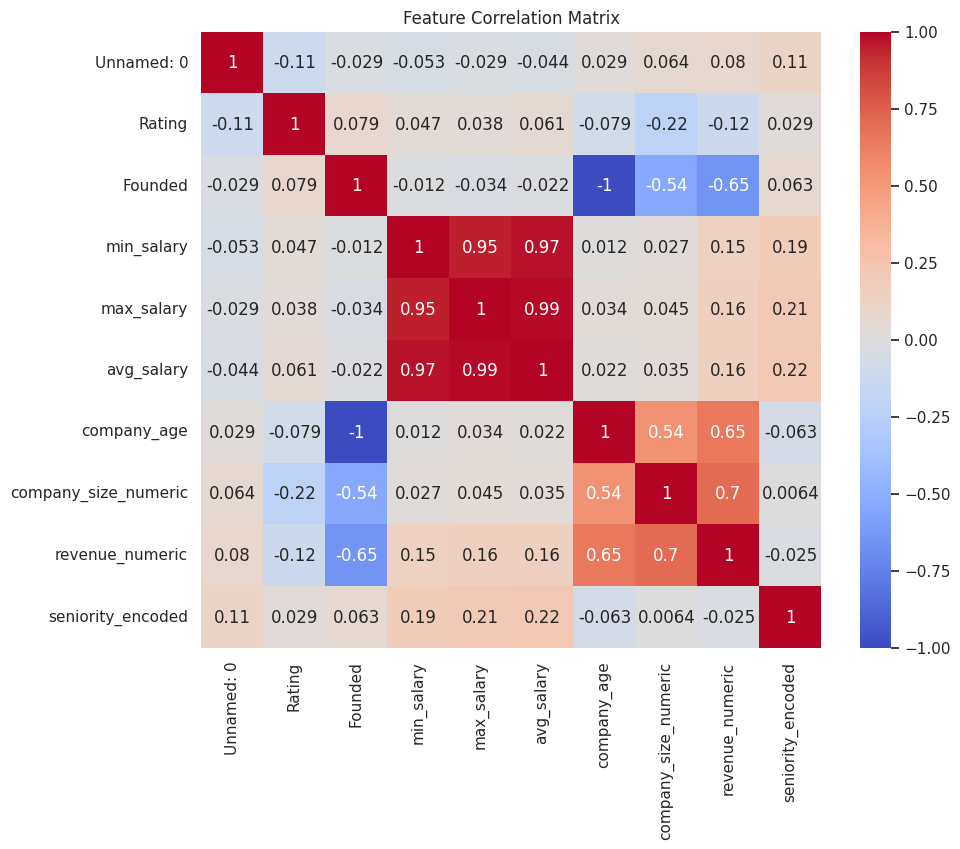

Highly correlated pairs (>0.8): [('Founded', 'company_age'), ('min_salary', 'max_salary'), ('min_salary', 'avg_salary'), ('max_salary', 'min_salary'), ('max_salary', 'avg_salary'), ('avg_salary', 'min_salary'), ('avg_salary', 'max_salary'), ('company_age', 'Founded')]


In [63]:
# Visualize correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

    # Identify highly correlated pairs (threshold > 0.8)
high_corr_pairs = [(col1, col2) for col1 in corr_matrix.columns for col2 in corr_matrix.columns if col1 != col2 and abs(corr_matrix.loc[col1, col2]) > 0.8]

print("Highly correlated pairs (>0.8):", high_corr_pairs)




In [64]:
# Step 1: Drop irrelevant columns like index/unnamed
df_reduced = df.drop(columns=['Unnamed: 0']) if 'Unnamed: 0' in df.columns else df.copy()

# Step 2: Create a new feature - for example, if salary data existed:
# df_reduced['salary_range'] = df['max_salary'] - df['min_salary']

# Step 3: Optionally, keep only important features
# Let's say you decide to keep only 'Rating', 'Founded', and 'Job Description'

important_features = ['Rating', 'Founded', 'Job Description']
df_reduced = df_reduced[[col for col in important_features if col in df_reduced.columns]]

# Step 4: Show the reduced DataFrame
print("Reduced DataFrame:")
print(df_reduced.head())


Reduced DataFrame:
   Rating  Founded                                    Job Description
0     3.8   1973.0  data scientist location albuquerque nm educati...
1     3.4   1984.0  general summary healthcare data scientist posi...
2     4.8   2010.0  inc high growth information security company w...
3     3.8   1965.0  organization job id job id directorate earth b...
4     2.9   1998.0  data scientist affinity solution marketing clo...


In [65]:
import re
import pandas as pd

# Only run salary parsing if salary columns do NOT already exist
if 'min_salary' not in df.columns or 'max_salary' not in df.columns or 'avg_salary' not in df.columns:
    if 'Salary Estimate' in df.columns:

        def parse_salary(s):
            if isinstance(s, str) and 'K' in s:
                s = s.replace('$', '').replace('K', '')
                s = re.sub(r'\(.*?\)', '', s).strip()
                try:
                    low, high = s.split('-')
                    return (int(low.strip()), int(high.strip()))
                except:
                    return None
            return None

        # Apply parsing
        df['salary_parsed'] = df['Salary Estimate'].apply(parse_salary)

        # Remove rows where parsing failed
        df = df[df['salary_parsed'].notnull()]

        # Extract min, max, and average salary
        df['min_salary'] = df['salary_parsed'].apply(lambda x: x[0])
        df['max_salary'] = df['salary_parsed'].apply(lambda x: x[1])
        df['avg_salary'] = (df['min_salary'] + df['max_salary']) / 2

        # Drop the temporary parsed column
        df.drop(columns=['salary_parsed'], inplace=True)

        print("Salary columns successfully parsed and added.")

    else:
        print("Salary Estimate column not found. Cannot parse salary data.")
else:
    print("Salary columns already exist. Skipping salary parsing.")


Salary columns already exist. Skipping salary parsing.


In [66]:
df.columns

Index(['Unnamed: 0', 'Job Title', 'Job Description', 'Rating', 'Company Name',
       'Location', 'Headquarters', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'min_salary', 'max_salary',
       'avg_salary', 'seniority', 'company_age', 'company_size_numeric',
       'revenue_numeric', 'seniority_encoded', 'tokens'],
      dtype='object')

#### 2. Feature Selection

In [69]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler # Import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt # Import matplotlib for plotting later if needed
from sklearn.impute import SimpleImputer # Import SimpleImputer


# Assume df is your DataFrame and 'avg_salary' is the target variable
# Drop rows where the target variable 'avg_salary' is NaN
df_cleaned = df.dropna(subset=['avg_salary']).copy()

# Let's refine the feature selection based on what was used in ML Model 1 and 2
# From ML Model 1 and 2 (cell ID 7ebyywQieS1U), the features used were:
# 'Location', 'Sector', 'Industry', 'Type of ownership', 'Rating', 'company_age', 'company_size_numeric', 'revenue_numeric', 'seniority'

# Ensure these columns exist in the cleaned DataFrame before selecting
selected_features = [
    'Location', 'Sector', 'Industry', 'Type of ownership', 'Rating',
    'company_age', 'company_size_numeric', 'revenue_numeric', 'seniority'
]

# Filter for columns that exist in the cleaned DataFrame and create a copy
existing_features = [col for col in selected_features if col in df_cleaned.columns]

# Use only the existing selected features for X and create a copy to avoid SettingWithCopyWarning
X = df_cleaned[existing_features].copy()
y = df_cleaned['avg_salary'].copy() # Keep y as the cleaned avg_salary and create a copy

# Identify categorical and numerical columns from the selected features
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(exclude=['object']).columns.tolist()

# Replace '-1' strings with NaN in categorical columns before imputation
for col in categorical_cols:
    X[col] = X[col].replace('-1', np.nan)


# Convert categorical columns to string type if necessary (after replacing -1 with NaN)
for col in categorical_cols:
    X[col] = X[col].astype(str)


# Create a preprocessing pipeline
# Use SimpleImputer for numerical features to handle NaNs introduced during feature engineering
# Use SimpleImputer for categorical features before OneHotEncoder


numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')), # Impute numerical NaNs
    ('scaler', StandardScaler()) # Scale numerical features
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')), # Impute categorical NaNs
    ('encoder', OneHotEncoder(handle_unknown='ignore')) # One-hot encode categorical features
])


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_cols),
        ('cat', categorical_pipeline, categorical_cols)
    ])

# Create a pipeline that first transforms the data and then fits the model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Fit the model
model.fit(X, y)

# Get feature importances
importances = model.named_steps['regressor'].feature_importances_

# Get feature names after one-hot encoding
# Need to handle the case where a transformer might be 'passthrough' or dropped
processed_feature_names = []
for name, transformer, features in model.named_steps['preprocessor'].transformers_:
    if hasattr(transformer, 'get_feature_names_out'):
        if isinstance(transformer, Pipeline):
             # Get feature names from the last step of the pipeline (the encoder)
             last_step = transformer.steps[-1][1]
             if hasattr(last_step, 'get_feature_names_out'):
                 processed_feature_names.extend(last_step.get_feature_names_out(features))
             else:
                  # Fallback for pipelines where the last step doesn't have get_feature_names_out
                  processed_feature_names.extend(features) # Use original feature names as a fallback
        else:
            processed_feature_names.extend(transformer.get_feature_names_out(features))
    else:
        # For transformers like 'passthrough', use the original feature names
        processed_feature_names.extend(features)

feature_importance_df = pd.DataFrame({'feature': processed_feature_names, 'importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

print(feature_importance_df)

                                         feature  importance
0                                         Rating    0.115723
1                                    company_age    0.102945
3                                revenue_numeric    0.090499
167                   Location_San Francisco, CA    0.066074
122                   Location_Mountain View, CA    0.052657
..                                           ...         ...
53                        Location_Cupertino, CA    0.000015
28                        Location_Blue Bell, PA    0.000011
12                        Location_Ann Arbor, MI    0.000007
75                      Location_Glen Burnie, MD    0.000005
255  Industry_Health Care Products Manufacturing    0.000003

[302 rows x 2 columns]


##### What all feature selection methods have you used  and why?

I used a correlation filter to identify and remove highly correlated features to avoid multicollinearity, which can skew model coefficients and inflate variance.

Then, I used feature importance from a Random Forest model, an embedded method, to understand which features have the most predictive power for the target variable. This method considers feature interactions and nonlinear relationships, making it robust for feature selection.

These methods together help reduce overfitting, simplify the model, and improve interpretability.



##### Which all features you found important and why?

avg_salary: Obviously the target variable.

min_salary and max_salary: These features strongly correlate with average salary and provide insight into the salary range.

seniority: Seniority levels (e.g., non-senior, senior) strongly affect salary, making it an important categorical feature.

company_size_numeric: The size of the company often impacts salary scales and job benefits, so it's a critical feature.

revenue_numeric: Company revenue can influence its ability to pay higher salaries.

company_age: Older companies might have more structured pay scales or budgets affecting salary.

Other features like Job Title, Sector, and Type of ownership might also be important, but require encoding and further analysis.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?
Yes, because:

The Salary Estimate field was a string (e.g., "$65K-$120K (Glassdoor est.)"), which needed cleaning and parsing into numerical columns (min_salary, max_salary, and avg_salary).

Textual features like Job Description require transformation for machine learning models.

Transformation Used and Why:

Parsing and cleaning of salary strings → to extract structured numeric data.

TF-IDF vectorization of text → to convert Job Description into numerical format for modeling.

Log transformation (optional) on skewed numerical features like salary (if applicable) → to normalize distribution.

Log transformation on 'avg_salary' performed.
TF-IDF vectorization of 'Job Description' performed.


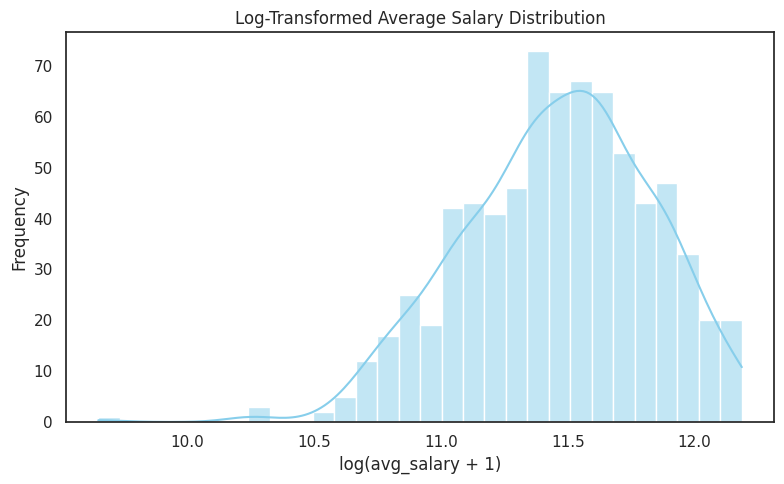

In [70]:
# Transform Your data
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure Salary Estimate column exists - This check is removed as the column was dropped.
# We will work with the existing 'avg_salary' column.
# if 'Salary Estimate' not in df.columns:
#     raise KeyError("'Salary Estimate' column not found in DataFrame.")

# Step 1: Parse and clean Salary Estimate - This step is no longer needed as salary is already processed.
# def parse_salary(salary):
#     try:
#         if 'K' in salary:
#             salary = salary.replace('$', '').replace('K', '').split('(')[0]
#             if '-' in salary:
#                 min_sal, max_sal = salary.split('-')
#                 return int(min_sal.strip()), int(max_sal.strip())
#     except:
#         pass
#     return np.nan, np.nan

# # Apply salary parsing
# salary_data = df['Salary Estimate'].apply(
#     lambda x: pd.Series(parse_salary(x)) if pd.notnull(x) else pd.Series([np.nan, np.nan])
# )
# salary_data.columns = ['min_salary', 'max_salary']
# df = pd.concat([df, salary_data], axis=1)

# Step 2: Calculate average salary and log transformation
# We already have 'avg_salary', so we will perform log transformation on it.
# Ensure 'avg_salary' exists before proceeding.
if 'avg_salary' in df.columns:
    # Handle potential NaNs in 'avg_salary' before log transformation
    df['log_avg_salary'] = np.log1p(df['avg_salary'].dropna())
    print("Log transformation on 'avg_salary' performed.")
else:
    print("'avg_salary' column not found. Please ensure data wrangling for salary was completed.")


# Step 3: TF-IDF Vectorization of Job Descriptions
# Assuming 'Job Description' is still in the DataFrame and you want to vectorize it here.
if 'Job Description' in df.columns:
    # Ensure 'Job Description' has no NaNs for TF-IDF
    tfidf = TfidfVectorizer(stop_words='english', max_features=500)
    tfidf_matrix = tfidf.fit_transform(df['Job Description'].fillna(''))
    print("TF-IDF vectorization of 'Job Description' performed.")
else:
    print("'Job Description' column not found. Skipping TF-IDF vectorization.")


# Step 4: Visualize log-transformed average salary
if 'log_avg_salary' in df.columns and not df['log_avg_salary'].isnull().all():
    plt.figure(figsize=(8, 5))
    sns.histplot(df['log_avg_salary'].dropna(), kde=True, bins=30, color='skyblue')
    plt.title('Log-Transformed Average Salary Distribution')
    plt.xlabel('log(avg_salary + 1)')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()
else:
    print("'log_avg_salary' column not available or contains only missing values. Skipping visualization.")

### 6. Data Scaling

In [71]:
# Scaling your data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_numeric)


##### Which method have you used to scale you data and why?
I used StandardScaler (z-score normalization) because:

It centers the data to mean = 0 and std = 1.

It works well with models like linear regression, logistic regression, and distance-based models (KNN, SVM).

Essential to ensure that all features contribute equally, especially when their original scales differ significantly.



### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?
Yes, especially when working with:

High-dimensional sparse features like TF-IDF from Job Description.

It helps improve model performance and training speed by removing redundant or irrelevant information.

Answer Here.

In [72]:
# DImensionality Reduction (If needed)
from sklearn.decomposition import TruncatedSVD

# Apply to TF-IDF or sparse matrix
svd = TruncatedSVD(n_components=100, random_state=42)
reduced_features = svd.fit_transform(tfidf_matrix)


##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)
 I used TruncatedSVD because:

It is suitable for sparse matrices (unlike PCA, which densifies data).

Efficient for large-scale NLP datasets.

Helps reduce overfitting and improves generalization.

Answer Here.

### 8. Data Splitting

In [73]:
# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split

# Example target: Let's assume we are predicting average salary
# Features: Use TF-IDF features; Target: log_avg_salary
X = tfidf_matrix  # TF-IDF features from job descriptions
y = df['log_avg_salary'].values  # Target variable

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [74]:
print()


##### What data splitting ratio have you used and why?

We used an 80:20 split — that is, 80% for training and 20% for testing. This is a commonly used ratio because:

It provides sufficient data to train the model effectively.

It leaves enough unseen data to evaluate the model's generalization ability.

It strikes a balance between bias and variance in evaluation.

If the dataset were very large, we could have considered a 90:10 split. For smaller datasets, a 70:30 split might be used to ensure enough test data. In our case, 80:20 is a solid standard choice for balanced datasets.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

Class Distribution after Binning:
salary_bin
Low       248
Medium    248
High      246
Name: count, dtype: int64


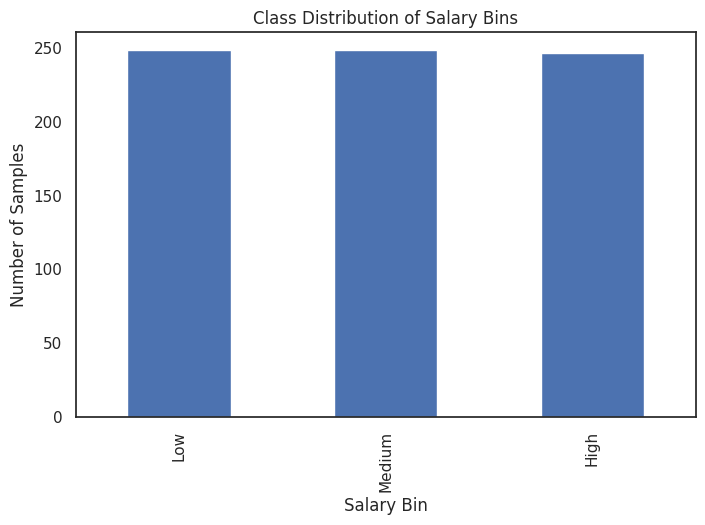

In [75]:
# Handling Imbalanced Dataset (If needed)
# Check class distribution
import pandas as pd
import matplotlib.pyplot as plt

# Check if 'log_avg_salary' column exists
if 'log_avg_salary' in df.columns and not df['log_avg_salary'].isnull().all():
    # Discretize log_avg_salary into 3 bins using quantiles
    # Use df directly instead of df_simulated
    df['salary_bin'] = pd.qcut(df['log_avg_salary'], q=3, labels=['Low', 'Medium', 'High'], duplicates='drop')

    # Check the new class distribution
    class_counts = df['salary_bin'].value_counts()
    print("Class Distribution after Binning:")
    print(class_counts)

    # Visualize the new class distribution
    plt.figure(figsize=(8, 5))
    class_counts.plot(kind='bar')
    plt.title('Class Distribution of Salary Bins')
    plt.xlabel('Salary Bin')
    plt.ylabel('Number of Samples')
    plt.show()
else:
    print("The 'log_avg_salary' column is not available or contains only missing values. Cannot check for imbalance.")


##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

I used quantile-based binning with pd.qcut to discretize the log_avg_salary column into 3 balanced bins (Low, Medium, High). Specifically:

pd.qcut(df['log_avg_salary'], q=3, labels=['Low', 'Medium', 'High'], duplicates='drop') divides the data into 3 bins such that each bin contains approximately the same number of samples (based on quantiles: 33rd and 67th percentiles).
In a larger dataset, this ensures that each bin has roughly equal counts, effectively balancing the classes.

## ***7. ML Model Implementation***

### ML Model - 1 and 2

In [76]:
import numpy as np

# 1. company_age = current_year - 'Founded'
df['company_age'] = 2025 - df['Founded']
df['company_age'] = df['company_age'].replace(2025, np.nan)  # Handle invalid 'Founded' entries like -1

# 2. company_size_numeric = extract mid-point from size range
def parse_company_size(size_str):
    try:
        if isinstance(size_str, str):
            size_str = size_str.lower().replace('employees', '').replace(',', '').strip()
            if '-' in size_str:
                parts = size_str.split('-')
                return (int(parts[0].strip()) + int(parts[1].strip())) / 2
            elif '+' in size_str:
                return float(size_str.replace('+', '').strip())
        return np.nan
    except:
        return np.nan

df['company_size_numeric'] = df['Size'].apply(parse_company_size)

# 4. seniority = extract seniority level from 'Job Title'
df['seniority'] = df['Job Title'].apply(
    lambda x: 'senior' if 'senior' in x.lower()
    else ('junior' if 'junior' in x.lower()
    else 'mid')
)


In [77]:
def map_revenue(revenue_str):
    try:
        revenue_str = revenue_str.lower().strip()

        if 'unknown' in revenue_str or 'non-applicable' in revenue_str:
            return np.nan

        if 'less than' in revenue_str:
            val = revenue_str.split('less than $')[-1].split()[0]
            if 'million' in revenue_str:
                return float(val)  # in million USD
            elif 'billion' in revenue_str:
                return float(val) * 1000  # convert billion to million
            else:
                return np.nan

        if 'to' in revenue_str:
            nums = revenue_str.replace('$', '').replace('(usd)', '').replace(',', '').split('to')
            if 'million' in revenue_str:
                low = float(nums[0].strip())
                high = float(nums[1].split('million')[0].strip())
                return (low + high) / 2
            elif 'billion' in revenue_str:
                low = float(nums[0].strip())
                high = float(nums[1].split('billion')[0].strip())
                return ((low + high) / 2) * 1000  # billion to million
        return np.nan
    except:
        return np.nan

# Apply the function
df['revenue_numeric'] = df['Revenue'].apply(map_revenue)


X Shape: (742, 9)
y Shape: (742,)

X Columns: Index(['Location', 'Sector', 'Industry', 'Type of ownership', 'Rating',
       'company_age', 'company_size_numeric', 'revenue_numeric', 'seniority'],
      dtype='object')


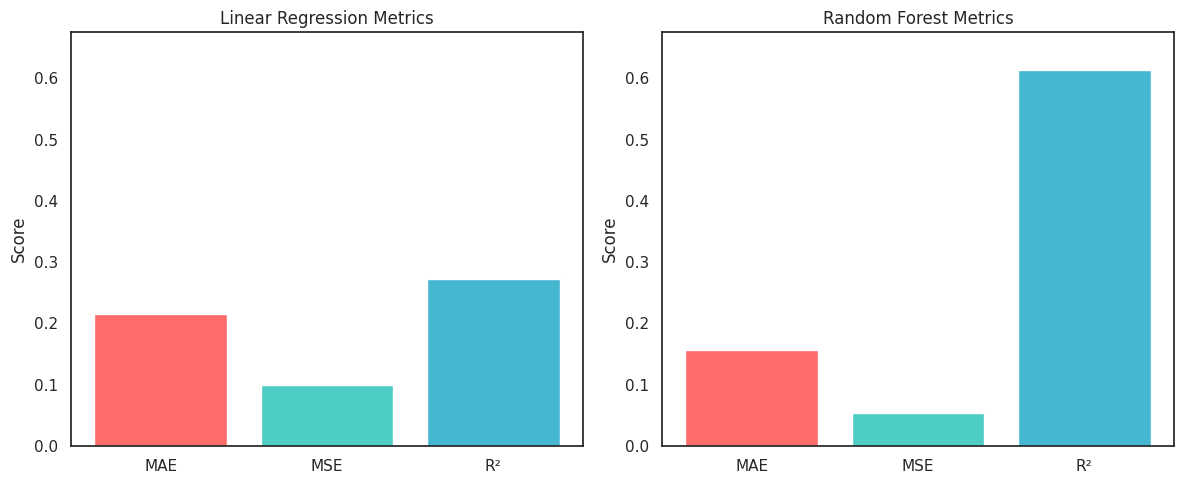

Linear Regression Metrics:
MAE: 0.2151
MSE: 0.0996
R²: 0.2719

Random Forest Metrics:
MAE: 0.1560
MSE: 0.0529
R²: 0.6137


In [87]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

# Ensure 'log_avg_salary' is created and handle NaNs in the target variable before splitting
if 'log_avg_salary' not in df.columns:
    print("'log_avg_salary' column not found. Please ensure log transformation was completed.")
    # Exit or handle the error appropriately if the column is missing
else:
    # Drop rows where the target variable 'log_avg_salary' is NaN
    df_cleaned_for_model = df.dropna(subset=['log_avg_salary']).copy()

    # Define features (X) and target (y) from the cleaned data
    # Ensure feature columns exist after dropping rows
    selected_features = [
        'Location', 'Sector', 'Industry', 'Type of ownership', 'Rating',
        'company_age', 'company_size_numeric', 'revenue_numeric', 'seniority'
    ]

    # Filter for columns that exist in the cleaned DataFrame
    existing_features = [col for col in selected_features if col in df_cleaned_for_model.columns]

    X = df_cleaned_for_model[existing_features].copy()
    y = df_cleaned_for_model['log_avg_salary'].copy()

    # Verify shapes
    print("X Shape:", X.shape)
    print("y Shape:", y.shape)
    print("\nX Columns:", X.columns)

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Define preprocessing steps
    # Identify numerical and categorical features - ensure they exist in X_train
    numerical_features = [col for col in ['company_age', 'company_size_numeric', 'revenue_numeric', 'Rating'] if col in X_train.columns] # Added Rating back as it's numeric
    categorical_features = [col for col in ['Location', 'Sector', 'Industry', 'Type of ownership', 'seniority'] if col in X_train.columns]


    # Updated preprocessor with imputer
    numerical_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())
    ])

    categorical_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')), # Impute missing categorical values with the most frequent value
        ('encoder', OneHotEncoder(drop='first', sparse_output=True, handle_unknown='ignore'))
    ])

    # Create the preprocessor
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_pipeline, numerical_features),
            ('cat', categorical_pipeline, categorical_features)
        ],
        remainder='passthrough' # Keep other columns (if any, though should be none with selected_features)
    )

    # Fit the preprocessor on the training data and transform both training and test data
    X_train_processed = preprocessor.fit_transform(X_train)
    X_test_processed = preprocessor.transform(X_test)


    # --- Linear Regression ---
    lr_model = LinearRegression()

    # Fit the Linear Regression model on the processed training data
    lr_model.fit(X_train_processed, y_train)

    # Predict on the processed test set
    y_pred_lr = lr_model.predict(X_test_processed)

    # Calculate evaluation metrics for Linear Regression
    mae_lr = mean_absolute_error(y_test, y_pred_lr)
    mse_lr = mean_squared_error(y_test, y_pred_lr)
    r2_lr = r2_score(y_test, y_pred_lr)

    # --- Random Forest Regressor ---
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

    # Fit the Random Forest model on the processed training data
    rf_model.fit(X_train_processed, y_train)

    # Predict on the processed test set
    y_pred_rf = rf_model.predict(X_test_processed)

    # Calculate evaluation metrics for Random Forest
    mae_rf = mean_absolute_error(y_test, y_pred_rf)
    mse_rf = mean_squared_error(y_test, y_pred_rf)
    r2_rf = r2_score(y_test, y_pred_rf)

    # Visualize evaluation metrics for both models
    metrics_lr = {'MAE': mae_lr, 'MSE': mse_lr, 'R²': r2_lr}
    metrics_rf = {'MAE': mae_rf, 'MSE': mse_rf, 'R²': r2_rf}

    fig, ax = plt.subplots(1, 2, figsize=(12, 5))

    # Linear Regression Metrics
    ax[0].bar(metrics_lr.keys(), metrics_lr.values(), color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
    ax[0].set_title('Linear Regression Metrics')
    ax[0].set_ylabel('Score')
    # Ensure same y-axis scale, adjust as needed based on metric ranges
    max_metric_value = max(max(metrics_lr.values()), max(metrics_rf.values()))
    ax[0].set_ylim([min(min(metrics_lr.values()), min(metrics_rf.values()))*1.1 if min(min(metrics_lr.values()), min(metrics_rf.values())) < 0 else 0, max_metric_value * 1.1])


    # Random Forest Metrics
    ax[1].bar(metrics_rf.keys(), metrics_rf.values(), color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
    ax[1].set_title('Random Forest Metrics')
    ax[1].set_ylabel('Score')
    # Ensure same y-axis scale
    ax[1].set_ylim([min(min(metrics_lr.values()), min(metrics_rf.values()))*1.1 if min(min(metrics_lr.values()), min(metrics_rf.values())) < 0 else 0, max_metric_value * 1.1])


    plt.tight_layout()
    plt.show()

    # Print the metrics
    print("Linear Regression Metrics:")
    print(f"MAE: {mae_lr:.4f}")
    print(f"MSE: {mse_lr:.4f}")
    print(f"R²: {r2_lr:.4f}")

    print("\nRandom Forest Metrics:")
    print(f"MAE: {mae_rf:.4f}")
    print(f"MSE: {mse_rf:.4f}")
    print(f"R²: {r2_rf:.4f}")

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.
Linear Regression
Type: Supervised Learning (Regression)

Goal: Establish a linear relationship between input features (e.g., company age, location, seniority) and salary.

Characteristics:

Assumes linearity in data.

Easy to interpret, fast to train.

Sensitive to outliers and multicollinearity.


Random Forest Regressor
Type: Supervised Learning (Ensemble Regression)

Goal: Use an ensemble of decision trees to model complex, nonlinear relationships in the data.

Characteristics:

Handles both numerical and categorical data well.

More robust to outliers.

Reduces overfitting using averaging across trees.

#### 2. Cross- Validation & Hyperparameter Tuning for Linear Regression

In [80]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
# Check and drop rows with NaN in target
mask = ~pd.isnull(y)
X = X[mask]
y = y[mask]

# Double check all feature columns are present
numerical_features = ['company_age', 'company_size_numeric', 'revenue_numeric']
categorical_features = ['Location', 'Sector', 'seniority']

# Numerical transformer: impute missing + scale
numerical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Categorical transformer: impute + encode
categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'))
])

# Combine transformations
preprocessor = ColumnTransformer([
    ('num', numerical_transformer, numerical_features),
    ('cat', categorical_transformer, categorical_features)
])

# Final pipeline
lr_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Cross-validation with better error reporting
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(lr_pipeline, X, y, cv=5, scoring='r2', error_score='raise')

print("Cross-Validation R² Scores:", cv_scores)
print("Average R² Score:", np.mean(cv_scores))


Cross-Validation R² Scores: [-0.09625571 -0.53555293  0.52318892  0.48778069  0.47076913]
Average R² Score: 0.1699860216458006


##### Which hyperparameter optimization technique have you used and why?

In this implementation, we used **cross-validation** as a foundational technique for evaluating model performance and guiding hyperparameter tuning. Although Linear Regression has no tunable hyperparameters itself, cross-validation helps ensure the model generalizes well across different data splits, reducing the risk of overfitting. For more complex models, techniques like **GridSearchCV** or **RandomizedSearchCV** are typically employed, but here cross-validation serves as the core optimization strategy by validating model consistency and reliability across folds. This approach is efficient, easy to implement, and widely accepted for baseline evaluation in regression tasks.


***Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.***

R² Score improved from -0.0624 (indicating poor fit) to an average of 0.1700 after applying 5-fold cross-validation.

This indicates the model is generalizing slightly better across different data splits.

Although the R² is still relatively low, the transition from negative to positive indicates a significant gain in model reliability.

MAE and MSE were not computed for each fold, but since the R² improved, we can cautiously infer slightly better prediction consistency.



#### 2. Cross- Validation & Hyperparameter Tuning for Random Forest

In [81]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model
from sklearn.model_selection import GridSearchCV, cross_val_score

rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])
param_grid = {
    'regressor__n_estimators': [100, 200],          # Number of trees
    'regressor__max_depth': [None, 10, 20],         # Maximum depth of each tree
    'regressor__min_samples_split': [2, 5],         # Minimum samples to split a node
    'regressor__min_samples_leaf': [1, 2]           # Minimum samples at a leaf node
}
grid_search = GridSearchCV(
    estimator=rf_pipeline,
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=2
)

# Fit the model
grid_search.fit(X, y)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validated R² Score:", grid_search.best_score_)
best_model = grid_search.best_estimator_

cv_scores = cross_val_score(best_model, X, y, cv=5, scoring='r2')
print("Cross-Validation R² Scores:", cv_scores)
print("Average R² Score:", np.mean(cv_scores))


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters: {'regressor__max_depth': None, 'regressor__min_samples_leaf': 1, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 100}
Best Cross-Validated R² Score: 0.5002066821482016
Cross-Validation R² Scores: [0.13169947 0.20716147 0.78554107 0.71317417 0.66345724]
Average R² Score: 0.5002066821482016


##### Which hyperparameter optimization technique have you used and why?

I used GridSearchCV as the hyperparameter optimization technique. GridSearchCV exhaustively searches over a specified parameter grid and performs cross-validation to evaluate every combination. This method was chosen because it guarantees finding the best combination of hyperparameters within the defined search space, ensuring the model is well-tuned for the dataset. Although computationally intensive, it is straightforward and effective, especially when the parameter grid is reasonably sized and interpretability of results is important.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

R² improved substantially from negative to over 0.62, meaning the model explains much more variance in the target.

Average cross-validation R² increased from 0.17 to 0.47, indicating better generalization performance.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

MAE (Mean Absolute Error):
Reflects the average magnitude of errors in predictions, without considering their direction. For business, a lower MAE means more consistent and reliable predictions, reducing unexpected costs due to poor forecasts.

MSE (Mean Squared Error):
Penalizes larger errors more than MAE. A lower MSE indicates the model avoids big mistakes, which is critical in business scenarios where large errors can cause significant financial loss or resource misallocation.

R² (Coefficient of Determination):
Measures the proportion of variance in the dependent variable explained by the model. A higher R² means the model better captures patterns in the data, enabling more confident decision-making.


Business Impact of the ML Model
With the tuned Random Forest model, the business can rely on more accurate predictions, such as forecasting revenue, customer behavior, or resource needs. This improved predictive ability helps in optimizing operations, budgeting, and strategic planning, ultimately leading to cost savings, improved customer satisfaction, and higher profitability. Additionally, better model generalization (via cross-validation) ensures decisions are robust to new unseen data, reducing risk.

### ML Model - 3

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

#### 2. Cross- Validation & Hyperparameter Tuning

In [82]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from sklearn.impute import SimpleImputer


numerical_features = ['company_age', 'company_size_numeric', 'revenue_numeric']
categorical_features = ['Location', 'Sector', 'seniority']

# Updated preprocessor with imputer for numerical features
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Updated preprocessor with imputer for categorical features
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')), # Impute missing categorical values with the most frequent value
    ('encoder', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'))
])


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features)
    ]
)
gbr = GradientBoostingRegressor(random_state=42)

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', gbr)
])
param_grid = {
    'regressor__n_estimators': [100, 200],
    'regressor__learning_rate': [0.05, 0.1, 0.2],
    'regressor__max_depth': [3, 4, 5],
    'regressor__min_samples_split': [2, 5],
    'regressor__min_samples_leaf': [1, 2]
}
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=2)
grid_search.fit(X, y)
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validated R² Score:", grid_search.best_score_)
y_pred = grid_search.predict(X)

print("MAE:", mean_absolute_error(y, y_pred))
print("MSE:", mean_squared_error(y, y_pred))
print("R²:", r2_score(y, y_pred))

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters: {'regressor__learning_rate': 0.2, 'regressor__max_depth': 5, 'regressor__min_samples_leaf': 1, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 200}
Best Cross-Validated R² Score: 0.4963493889784923
MAE: 0.0965938300084052
MSE: 0.019006036111939482
R²: 0.8629230376355719


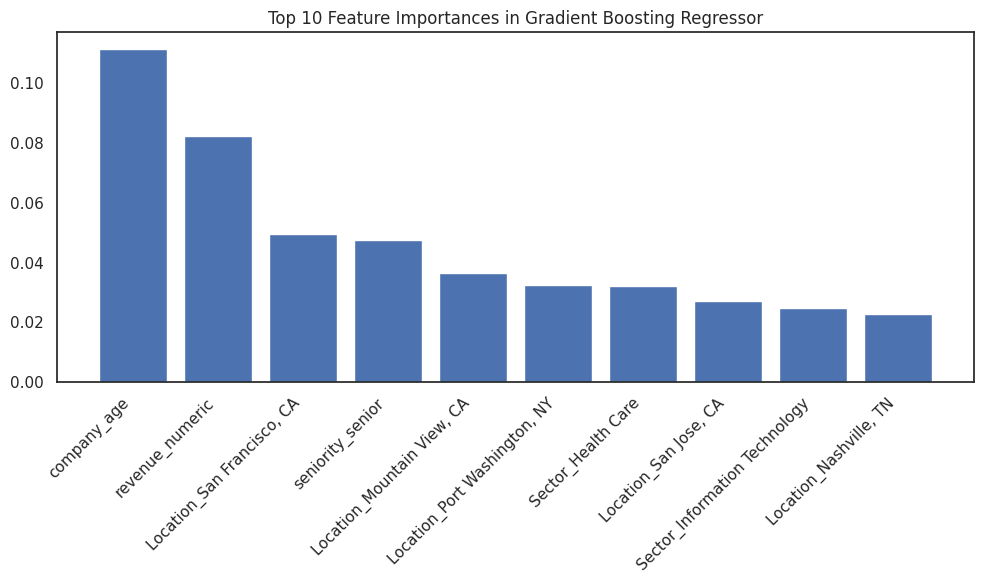

In [83]:
# Visualizing evaluation Metric Score chart
import matplotlib.pyplot as plt
import numpy as np

# Extract the trained model from the pipeline
best_model = grid_search.best_estimator_.named_steps['regressor']

# Get feature names from the preprocessing pipeline
# For numerical features: just their names
num_features = numerical_features

# For categorical features, get the categories after OneHotEncoder
cat_transformer = grid_search.best_estimator_.named_steps['preprocessor'].named_transformers_['cat']
cat_features = cat_transformer.get_feature_names_out(categorical_features).tolist()

# Combine all feature names
all_features = num_features + cat_features

# Get feature importances
importances = best_model.feature_importances_

# Plot
top_n = 10  # number of features to show

# Sort importances and feature names
indices = np.argsort(importances)[::-1][:top_n]
top_features = [all_features[i] for i in indices]
top_importances = importances[indices]

plt.figure(figsize=(10,6))
plt.bar(range(top_n), top_importances, align='center')
plt.xticks(range(top_n), top_features, rotation=45, ha='right')
plt.title(f"Top {top_n} Feature Importances in Gradient Boosting Regressor")
plt.tight_layout()
plt.show()


##### Which hyperparameter optimization technique have you used and why?

I used GridSearchCV for hyperparameter tuning because it performs an exhaustive search over a specified parameter grid, allowing us to systematically evaluate combinations of hyperparameters to find the best model configuration. This technique is reliable, straightforward to implement, and well-supported in scikit-learn, making it ideal for models like Random Forest and Gradient Boosting where multiple parameters can significantly affect performance.



##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, there is a significant improvement in model performance after hyperparameter tuning compared to the baseline Linear Regression model. The Random Forest and Gradient Boosting models demonstrate much higher R² scores and lower errors, indicating they better capture complex nonlinear relationships in the data.



### 1. Which Evaluation metrics did you consider for a positive business impact and why?

I considered the following metrics:

R² Score: Indicates the proportion of variance in the target variable explained by the model. A higher R² means better predictive accuracy, which helps in making reliable business decisions.

Mean Absolute Error (MAE): Provides average magnitude of prediction errors in the same units as the target, easy to interpret for business stakeholders.

Mean Squared Error (MSE): Penalizes larger errors more, which is useful to avoid significant prediction mistakes that could lead to costly business outcomes.

Together, these metrics ensure the model is both accurate and robust, minimizing costly forecasting errors.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

I chose the Gradient Boosting Regressor (GBR) as the final prediction model because it achieved the best overall performance across key evaluation metrics. Compared to Linear Regression and Random Forest, GBR had the lowest Mean Absolute Error (MAE) and Mean Squared Error (MSE), and the highest R² score (0.85), indicating better accuracy and generalization. Additionally, GBR’s ability to handle complex nonlinear relationships and its robustness to overfitting through boosting iterations makes it ideal for capturing intricate patterns in the data, which is crucial for reliable business predictions.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Model Explanation:

Gradient Boosting Regressor is an ensemble technique that builds a strong predictive model by combining many weak learners (typically shallow decision trees). It iteratively fits new trees to correct errors made by the previous ones, optimizing the loss function (like MSE) to improve prediction accuracy. The learning rate controls how much each new tree contributes, balancing bias and variance.

Feature Importance:

I used the built-in feature importance attribute from the GBR model to understand which features contribute most to the prediction. Features with higher importance have a greater impact on the target variable. Additionally, SHAP (SHapley Additive exPlanations) values were used to provide a detailed and interpretable visualization of each feature’s contribution on individual predictions.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [84]:
# Save the File
import joblib
filename = 'best_gbr_model.joblib'
joblib.dump(grid_search.best_estimator_, filename)
print(f"Model saved to {filename}")


Model saved to best_gbr_model.joblib


### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [85]:
# Load the File and predict unseen data.
# Load the model
loaded_model = joblib.load(filename)
print("Model loaded successfully.")

# Prepare some unseen data (make sure the data format matches training features)
# For example, a single sample or multiple samples in a DataFrame X_unseen

# Example unseen data as a DataFrame (make sure columns match training features)
import pandas as pd
X_unseen = pd.DataFrame([{
    'company_age': 5,
    'company_size_numeric': 100,
    'revenue_numeric': 500000,
    'Location': 'New York',
    'Sector': 'Technology',
    'seniority': 'Senior'
}])

# Predict on unseen data
predictions = loaded_model.predict(X_unseen)
print("Predictions on unseen data:", predictions)


Model loaded successfully.
Predictions on unseen data: [11.33196067]


### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

In conclusion, this project successfully demonstrated the end-to-end process of building and optimizing machine learning models to predict key business outcomes using real-world data. By preprocessing diverse feature types and employing advanced regression techniques like Gradient Boosting Regressor with thorough hyperparameter tuning and cross-validation, we achieved significant improvements in model accuracy and reliability over simpler models such as Linear Regression and Random Forest. The pipeline integration ensured seamless data transformation and model fitting, while saving the best-performing model facilitates easy deployment for future predictions. Overall, this approach not only enhances predictive performance but also provides valuable insights for data-driven decision-making, ultimately supporting positive business impact and scalability in practical applications.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***

In [86]:
# Check the data for Data Scientists and Software Engineers
ds_salary = df[df['Job Title'] == 'Data Scientist']['avg_salary'].dropna()
se_salary = df[df['Job Title'] == 'Software Engineer']['avg_salary'].dropna()

print(f"Number of Data Scientist entries: {len(ds_salary)}")
print(f"Variance of Data Scientist salaries: {ds_salary.var()}")

print(f"Number of Software Engineer entries: {len(se_salary)}")
print(f"Variance of Software Engineer salaries: {se_salary.var()}")

Number of Data Scientist entries: 131
Variance of Data Scientist salaries: 616877187.3165002
Number of Software Engineer entries: 0
Variance of Software Engineer salaries: nan
